In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
from glob import glob
from tqdm import tqdm
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 13})

In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
PLin = np.loadtxt("PLinear.dat")
print(PLin.shape)
kLin = PLin[:,0]
PLin_1 = PLin[:,0+1]
PLin_2 = PLin[:,0+2]
PLin_3 = PLin[:,0+3]
PLinInt_1 = interpolate(kLin,PLin_1,ext=2)
PLinInt_2 = interpolate(kLin,PLin_2,ext=2)
PLinInt_3 = interpolate(kLin,PLin_3,ext=2)

(703, 7)


Combine power and bispectrum arrays if were done in batches

In [3]:
#combine power and bispectrum arrays
# array1 = np.load(f'/scratch/s3487202/Results/bispectrum/rec_z127_fiducial_0-2499.npy')
# array2 = np.load(f'/scratch/s3487202/Results/bispectrum/rec_z127_fiducial_2500-4999.npy')
# array3 = np.load(f'/scratch/s3487202/Results/bispectrum/rec_z127_fiducial_5000-9999.npy')
# array4 = np.load(f'/scratch/s3487202/Results/bispectrum/rec_z127_fiducial_10000-14999.npy')
# array5 = np.load(f'/scratch/s3487202/Results/bispectrum/halo_data_z0_fiducial_9000-11999.npy')
# array6 = np.load(f'/scratch/s3487202/Results/bispectrum/halo_data_z0_fiducial_12000-14999.npy')

# # Reshape or slice each array to (3000, 221, 1)
# # Here, slicing is used to remove the last column
# # Concatenate arrays
# final_array = np.concatenate((array1, array2, array3, array4), axis=0)

# # # Verify the shape of the final array
# print(final_array.shape)  # Should print (15000, 221, 1)
# typey = 'fiducial'
# np.save(f"/scratch/s3487202/Results/bispectrum/rec_z127_{typey}.npy", final_array)

In [4]:
# typey = 'fiducial'
# BoxSize = 1000.
# number_halos = np.load(f"/scratch/s3487202/number_halos/{typey}/number_halos_0_{typey}.npy")
# nbar = number_halos / BoxSize**3


In [ ]:
BoxSize = 1000.
kF = 2*np.pi/BoxSize
# nbar = 256**3 / BoxSize**3
nbar = 512**3 / BoxSize**3 #aantal halos per veld dus len(pos_h)/BoxSize**3
typey = 'fiducial'
# print(np.load('/scratch/hb-CosmoGroup/Quijote_Measurements_npy/Pk_LC_m_z0.npy').shape)
# print(np.load(f"/scratch/s3487202/Results/power_spectrum/halo_data_z0_{typey}.npy").shape)
# bin_centers = np.load('/scratch/hb-CosmoGroup/Quijote_Measurements_npy/Pk_LC_m_z0.npy')[0,:,:3]
# bin_centers_halo = np.load(f"/scratch/s3487202/Results/power_spectrum/halo_data_z0_{typey}.npy")[0,:127,[0, 1, 4]]
# print(bin_centers)
bin_centers = np.load('/scratch/hb-CosmoGroup/Quijote_Measurements_npy/Bk_LC_m_z0.npy')[0,:,:3]
bin_centers_halo = np.load(f"/scratch/s3487202/Results/bispectrum/halo_data_z0_{typey}.npy")[0,:,:3]


squeezed_ordering = np.argsort(bin_centers[:,-1],kind='mergesort')


# Pk_k_2 = np.load(f"/scratch/s3487202/Results/power_spectrum/halo_data_z0_{typey}_2.npy")#[1,:81,0]
Pk_k = np.load(f"/scratch/s3487202/Results/power_spectrum/halo_data_z0_{typey}.npy")[1,:81,0]

number_halos = np.load(f"/scratch/s3487202/number_halos/{typey}/number_halos_0_{typey}.npy")


#Pk_k = np.load('/scratch/hb-CosmoGroup/Quijote_Measurements_npy/Pk_LC_m_z0.npy')[0,:81,0]

Load in your total spectrum arrays for analysis

In [14]:
def load_data_pre(typey):
    #nbar aantal halos per veld dus per sim inladen
    number_halos = np.load(f"/scratch/s3487202/number_halos/{typey}/number_halos_0_{typey}.npy")
 
    nbar = number_halos / BoxSize**3
    nbar_bi = nbar[:, np.newaxis] 
    nbar= np.repeat(nbar, 3, axis=0)

    nbar_bi= np.repeat(nbar_bi, 3, axis=0)

    
    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements/{typey}/0/Pk_m_256_PCS_{typey}_z=0_*.npy'))[:12500]
    # Pk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Pk_data = np.load(f"/scratch/s3487202/Results/power_spectrum/halo_data_z0_{typey}.npy")#[:500]
    # Pk_data = np.load(f"/scratch/s3487202/Results/power_spectrum/y_data_{typey}.npy")[:500]
    #Pk_data = np.load(f"/scratch/hb-CosmoGroup/Quijote_Measurements_npy/Pk_{typey}_z0.npy")
    Pk_0 = Pk_data[:,:81,1]-1/nbar
    Pk_2 = Pk_data[:,:81,2]#-1/nbar

    Pk =  np.concatenate([Pk_0,Pk_2],axis=1)
    # Pk =  Pk_0 #only monopole
    # Pk =  Pk_2 #only quadrupole
    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements/{typey}/0/Bk_m_256_PCS_{typey}_z=0_*.npy'))[:12500]
    # Bk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Bk_data = np.load(f"/scratch/s3487202/Results/bispectrum/halo_data_z0_{typey}.npy")#[:500]
    # Bk_data = np.load(f"/scratch/s3487202/Results/bispectrum/y_data_{typey}.npy")#[:500]
    #Bk_data = np.load(f"/scratch/hb-CosmoGroup/Quijote_Measurements_npy/Bk_{typey}_z0.npy")
    
    Pk_B = Bk_data[:,:,3:6]#-1/nbar_bi
    Bk = Bk_data[:,:,-2]
    # print(Pk_B)
    # print(Pk_B.sum(-1))
    # print(Pk_B.sum())
    Bk = Bk - (Pk_B).sum(-1)/nbar - 1/nbar**2
    Bk = Bk[:,squeezed_ordering]

    Pk_mean = Pk.mean(0)
    Bk_mean = Bk.mean(0)
   
    PB = np.concatenate([Pk,Bk],axis=1)
    PB_mean = PB.mean(0)
    
    return Pk, Pk_mean, Bk, Bk_mean, PB, PB_mean

def load_data_post(typey):
    # number_halos = np.load(f"/scratch/s3487202/number_halos/{typey}/number_halos_0_{typey}_.npy")
    #nbar = number_halos / BoxSize**3
    # nbar = number_halos / BoxSize**3
    # nbar_bi = nbar[:, np.newaxis] 
    # nbar= np.repeat(nbar, 3, axis=0)
    nbar = (0.011402733**2 / 0.01052**2)
    # nbar_bi= np.repeat(nbar_bi, 3, axis=0)

    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements_Reconstruction/{typey}/Pk_m_256_PCS_{typey}_recon_*.npy'))[:12500]
    # Pk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Pk_data = np.load(f"/scratch/s3487202/Results/power_spectrum/rec_z127_{typey}.npy")#[:500]#[30000:45000]

    #Pk_data = np.load(f"/scratch/hb-CosmoGroup/Quijote_Measurements_Reconstruction_npy/Pk_{typey}_recon_z0.npy")
    
    Pk_0 = Pk_data[:,:81,1]# * (0.011402733**2 / 0.01052**2)# -1/nbar
    Pk_2 = Pk_data[:,:81,2]
    Pk = np.concatenate([Pk_0,Pk_2],axis=1)
    # Pk = Pk_0  #only monopole
    # Pk =  Pk_2 #only quadrupole
    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements_Reconstruction/{typey}/Bk_m_256_PCS_{typey}_recon_*.npy'))[:12500]
    # Bk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Bk_data = np.load(f"/scratch/s3487202/Results/bispectrum/rec_z127_{typey}.npy")#[:500]#[30000:45000]


    #Bk_data = np.load(f"/scratch/hb-CosmoGroup/Quijote_Measurements_Reconstruction_npy/Bk_{typey}_recon_z0.npy")
    
    Pk_B = Bk_data[:,:,3:6]#-1/nbar
    Bk = Bk_data[:,:,-2]# * (0.011402733**3 / 0.01052**3)
    Bk = Bk# - (Pk_B).sum(-1)/nbar - 1/nbar**2
    Bk = Bk[:,squeezed_ordering]
    
    Pk_mean = Pk.mean(0)
    Bk_mean = Bk.mean(0)
    
    PB = np.concatenate([Pk,Bk],axis=1)
    PB_mean = PB.mean(0)
    
    return Pk, Pk_mean, Bk, Bk_mean, PB, PB_mean

In [7]:
%%time
Pk_fiducial_pre, Pk_fiducial_pre_mean, Bk_fiducial_pre, Bk_fiducial_pre_mean, PB_fiducial_pre, PB_fiducial_pre_mean = load_data_pre('fiducial')
Pk_fiducial_post, Pk_fiducial_post_mean, Bk_fiducial_post, Bk_fiducial_post_mean, PB_fiducial_post, PB_fiducial_post_mean = load_data_post('fiducial')


print(Pk_fiducial_post.shape,Bk_fiducial_pre_mean.shape,PB_fiducial_pre.shape)

# print(Pk_fiducial_post_mean)

(15000, 162) (2276,) (15000, 2438)
CPU times: user 1.42 s, sys: 2.68 s, total: 4.09 s
Wall time: 6.17 s


In [8]:
Pk_fiducial_y, Pk_fiducial_y_mean, Bk_fiducial_y, Bk_fiducial_y_mean, PB_fiducial_y, PB_fiducial_y_mean = load_data_pre('fiducial')
# Pk_fiducial_post, Pk_fiducial_post_mean, Bk_fiducial_post, Bk_fiducial_post_mean, PB_fiducial_post, PB_fiducial_post_mean = load_data_post('fiducial')

In [9]:
# plt.rcParams.update({
#     'font.size': 18,        # Default text size
#     'axes.labelsize': 20,   # Axis labels
#     'axes.titlesize': 22,   # Plot titles
#     'xtick.labelsize': 18,  # X-axis tick labels
#     'ytick.labelsize': 18   # Y-axis tick labels
# })

# plt.figure()
# plt.plot(Pk_k, Pk_k * Pk_fiducial_pre_mean[81:], label='final')
# plt.plot(Pk_k, Pk_k * Pk_fiducial_post_mean[81:], label='U-Net recon.')
# plt.plot(Pk_k, Pk_k * PLinInt_1(Pk_k), label='linear')

# plt.xlabel('$k$ [h/Mpc]')
# plt.ylabel('$k\,P_X(k)$ [(Mpc/h)$^2$]')
# # plt.xscale('log')
# # plt.yscale('symlog')

# plt.legend(loc=1)
# plt.xlim(0.01, 0.52)
# plt.grid(True, which="both", ls=":")
# # plt.yticks([1e2,2e2,3e2,4e2,6e2,1e3],["$10^2$","","","","","$10^3$"])
# plt.savefig('Plots/P_linear_quadrupole_shot_noise_2.pdf', format='pdf', bbox_inches='tight')
# plt.show()

# plt.figure(figsize=(6, 5))
# plt.plot(Pk_k, Pk_k * Pk_fiducial_pre_mean[81:], label='final')
# plt.plot(Pk_k, Pk_k * Pk_fiducial_post_mean[81:], label='U-Net recon.')
# plt.plot(Pk_k, Pk_k * Pk_fiducial_y_mean[81:], label='linear')

# plt.xlabel('$k$ [h/Mpc]')
# plt.ylabel('$k\,P_X(k)$ [(Mpc/h)$^2$]')
# # plt.xscale('log')
# # plt.yscale('symlog')

# plt.legend(loc=1, fontsize =13)
# plt.xlim(0.01, 0.52)
# # plt.grid(True, which="both", ls=":")
# # plt.yticks([1e2,2e2,3e2,4e2,6e2,1e3],["$10^2$","","","","","$10^3$"])
# plt.savefig('Plots/P_linear_quadrupole_shot_noise_2.pdf', format='pdf', bbox_inches='tight')
# plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Update font sizes
plt.rcParams.update({
    'font.size': 18,        # Default text size
    'axes.labelsize': 20,   # Axis labels
    'axes.titlesize': 22,   # Plot titles
    'xtick.labelsize': 18,  # X-axis tick labels
    'ytick.labelsize': 18   # Y-axis tick labels
})

# First figure (log-log scale)
fig1, ax1 = plt.subplots(figsize=(6, 5))

ax1.loglog(Pk_k, Pk_k**1 * Pk_fiducial_pre_mean[:81], label='final')
ax1.loglog(Pk_k, Pk_k**1 * Pk_fiducial_post_mean[:81], label='U-Net recon.')
ax1.loglog(Pk_k, Pk_k**1 * PLinInt_1(Pk_k), label='linear')
ax1.set_xlabel('$k$ [h/Mpc]')
ax1.set_ylabel('$k\,P_X(k)$ [(Mpc/h)$^2$]')
ax1.legend(loc=3, fontsize=13)
ax1.set_ylim(1e2, 2e3)
ax1.set_yticks([1e2, 2e2, 3e2, 4e2, 6e2, 1e3])
ax1.set_yticklabels(["$10^2$", "", "", "", "", "$10^3$"])
# Uncomment the following line if you want grid
# ax1.grid(True, which="both", ls=":")

# Adjust layout
plt.tight_layout()
plt.savefig('Plots/power_spectra_monopole.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Second figure (linear y-axis)
fig2, ax2 = plt.subplots(figsize=(6, 5))

ax2.plot(Pk_k, Pk_k * Pk_fiducial_pre_mean[81:], label='final')
ax2.plot(Pk_k, Pk_k * Pk_fiducial_post_mean[81:], label='U-Net recon.')
ax2.plot(Pk_k, Pk_k * Pk_fiducial_y_mean[81:], label='linear')
ax2.set_xlabel('$k$ [h/Mpc]')
ax2.set_ylabel('$k\,P_X(k)$ [(Mpc/h)$^2$]')
ax2.legend(loc=1, fontsize=13)
# Uncomment the following lines if you want grid and specific y-ticks
# ax2.grid(True, which="both", ls=":")
# ax2.set_yticks([1e2, 2e2, 3e2, 4e2, 6e2, 1e3])
# ax2.set_yticklabels(["$10^2$", "", "", "", "", "$10^3$"])

# Adjust layout
plt.tight_layout()
plt.savefig('Plots/power_spectra_quadrupole.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 18,        # Default text size
    'axes.labelsize': 24,   # Axis labels
    'axes.titlesize': 24,   # Plot titles
    'xtick.labelsize': 24,  # X-axis tick labels
    'ytick.labelsize': 24   # Y-axis tick labels
})



# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 8), sharex=True, sharey=True)

# First subplot
axs[0].plot(Pk_k, (np.log( Pk_LC_p_pre_mean[:81]) - np.log( Pk_LC_m_pre_mean[:81])), label='local')
axs[0].plot(Pk_k, (np.log(Pk_EQ_p_pre_mean[:81]) - np.log(Pk_EQ_m_pre_mean[:81])), label='Equilateral')
axs[0].plot(Pk_k,(np.log(Pk_OR_LSS_p_pre_mean[:81]) - np.log(Pk_OR_LSS_m_pre_mean[:81])), label='orthogonal')
axs[0].set_xscale('log')
axs[0].set_xlabel('$k$ [h/Mpc]')
axs[0].set_ylabel(r'$\frac{d \ln P(k)}{d f_{\mathrm{NL}}}$', fontsize=38)
# axs[0].set_xlim(0.01, 0.52)
# axs[0].legend(loc=1, fontsize=10)
axs[0].set_title('Pre Monopole')

# Second subplot
axs[1].plot(Pk_k, (np.log(Pk_LC_p_pre_mean[81:]) - np.log(Pk_LC_m_pre_mean[81:])), label='local')
axs[1].plot(Pk_k, (np.log(Pk_EQ_p_pre_mean[81:]) - np.log(Pk_EQ_m_pre_mean[81:])), label='Equilateral')
axs[1].plot(Pk_k, (np.log(Pk_OR_LSS_p_pre_mean[81:]) - np.log(Pk_OR_LSS_m_pre_mean[81:])), label='orthogonal')
axs[1].set_xscale('log')
axs[1].set_xlabel('$k$ [h/Mpc]')
# axs[1].set_xlim(0.01, 0.52)
# axs[1].legend(loc=1, fontsize=10)
axs[1].set_title('Pre Quadrupole')

# Third subplot
axs[2].plot(Pk_k, (np.log(Pk_LC_p_post_mean[:81]) - np.log(Pk_LC_m_post_mean[:81])), label='local')
axs[2].plot(Pk_k, (np.log(Pk_EQ_p_post_mean[:81]) - np.log(Pk_EQ_m_post_mean[:81])), label='Equilateral')
axs[2].plot(Pk_k, (np.log(Pk_OR_LSS_p_post_mean[:81]) - np.log(Pk_OR_LSS_m_post_mean[:81])), label='orthogonal')
axs[2].set_xscale('log')
axs[2].set_xlabel('$k$ [h/Mpc]')
# axs[2].set_xlim(0.01, 0.52)
axs[2].legend(loc=1, fontsize=26)
axs[2].set_title('Post Monopole')

# axs[3].plot(Pk_k, (np.log(Pk_LC_p_post_mean[81:]) - np.log(Pk_LC_m_post_mean[81:])), label='local')
# axs[3].plot(Pk_k, (np.log(Pk_EQ_p_post_mean[81:]) - np.log(Pk_EQ_m_post_mean[81:])), label='Equilateral')
# axs[3].plot(Pk_k, (np.log(Pk_OR_LSS_p_post_mean[81:]) - np.log(Pk_OR_LSS_m_post_mean[81:])), label='orthogonal')
# axs[3].set_xscale('log')
# axs[3].set_xlabel('$k$ [h/Mpc]')
# # axs[2].set_xlim(0.01, 0.52)
# axs[3].legend(loc=1, fontsize=18)
# axs[3].set_title('Post Monopole')

# Adjust layout
plt.tight_layout()
plt.savefig('Plots/scale_dep_bias.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
print(Bk_fiducial_pre.shape)
plt.hist(Bk_fiducial_pre[:,0], bins =100, density =True)
plt.hist(Bk_h_m_pre[:,0],bins =100, density = True)
plt.show()

print(Bk_fiducial_pre.shape)
plt.hist(Bk_fiducial_pre[:,-1], bins =100, density =True)
plt.hist(Bk_h_m_pre[:,-1],bins =100, density = True)
plt.show()

## Load the measurements

In [15]:


Pk_LC_m_pre, Pk_LC_m_pre_mean, Bk_LC_m_pre, Bk_LC_m_pre_mean, PB_LC_m_pre, PB_LC_m_pre_mean = load_data_pre('LC_m')
Pk_LC_p_pre, Pk_LC_p_pre_mean, Bk_LC_p_pre, Bk_LC_p_pre_mean, PB_LC_p_pre, PB_LC_p_pre_mean = load_data_pre('LC_p')

Pk_EQ_m_pre, Pk_EQ_m_pre_mean, Bk_EQ_m_pre, Bk_EQ_m_pre_mean, PB_EQ_m_pre, PB_EQ_m_pre_mean = load_data_pre('EQ_m')
Pk_EQ_p_pre, Pk_EQ_p_pre_mean, Bk_EQ_p_pre, Bk_EQ_p_pre_mean, PB_EQ_p_pre, PB_EQ_p_pre_mean = load_data_pre('EQ_p')

Pk_OR_LSS_m_pre, Pk_OR_LSS_m_pre_mean, Bk_OR_LSS_m_pre, Bk_OR_LSS_m_pre_mean, PB_OR_LSS_m_pre, PB_OR_LSS_m_pre_mean = load_data_pre('OR_LSS_m')
Pk_OR_LSS_p_pre, Pk_OR_LSS_p_pre_mean, Bk_OR_LSS_p_pre, Bk_OR_LSS_p_pre_mean, PB_OR_LSS_p_pre, PB_OR_LSS_p_pre_mean = load_data_pre('OR_LSS_p')

Pk_h_m_pre, Pk_h_m_pre_mean, Bk_h_m_pre, Bk_h_m_pre_mean, PB_h_m_pre, PB_h_m_pre_mean = load_data_pre('h_m')
Pk_h_p_pre, Pk_h_p_pre_mean, Bk_h_p_pre, Bk_h_p_pre_mean, PB_h_p_pre, PB_h_p_pre_mean = load_data_pre('h_p')

Pk_ns_m_pre, Pk_ns_m_pre_mean, Bk_ns_m_pre, Bk_ns_m_pre_mean, PB_ns_m_pre, PB_ns_m_pre_mean = load_data_pre('ns_m')
Pk_ns_p_pre, Pk_ns_p_pre_mean, Bk_ns_p_pre, Bk_ns_p_pre_mean, PB_ns_p_pre, PB_ns_p_pre_mean = load_data_pre('ns_p')

Pk_Om_m_pre, Pk_Om_m_pre_mean, Bk_Om_m_pre, Bk_Om_m_pre_mean, PB_Om_m_pre, PB_Om_m_pre_mean = load_data_pre('Om_m')
Pk_Om_p_pre, Pk_Om_p_pre_mean, Bk_Om_p_pre, Bk_Om_p_pre_mean, PB_Om_p_pre, PB_Om_p_pre_mean = load_data_pre('Om_p')

Pk_Ob2_m_pre, Pk_Ob2_m_pre_mean, Bk_Ob2_m_pre, Bk_Ob2_m_pre_mean, PB_Ob2_m_pre, PB_Ob2_m_pre_mean = load_data_pre('Ob2_m')
Pk_Ob2_p_pre, Pk_Ob2_p_pre_mean, Bk_Ob2_p_pre, Bk_Ob2_p_pre_mean, PB_Ob2_p_pre, PB_Ob2_p_pre_mean = load_data_pre('Ob2_p')

Pk_s8_m_pre, Pk_s8_m_pre_mean, Bk_s8_m_pre, Bk_s8_m_pre_mean, PB_s8_m_pre, PB_s8_m_pre_mean = load_data_pre('s8_m')
Pk_s8_p_pre, Pk_s8_p_pre_mean, Bk_s8_p_pre, Bk_s8_p_pre_mean, PB_s8_p_pre, PB_s8_p_pre_mean = load_data_pre('s8_p')


In [16]:
# Pk_fiducial_post, Pk_fiducial_post_mean, Bk_fiducial_post, Bk_fiducial_post_mean, PB_fiducial_post, PB_fiducial_post_mean = load_data_post('fiducial')

Pk_LC_m_post, Pk_LC_m_post_mean, Bk_LC_m_post, Bk_LC_m_post_mean, PB_LC_m_post, PB_LC_m_post_mean = load_data_post('LC_m')
Pk_LC_p_post, Pk_LC_p_post_mean, Bk_LC_p_post, Bk_LC_p_post_mean, PB_LC_p_post, PB_LC_p_post_mean = load_data_post('LC_p')

Pk_EQ_m_post, Pk_EQ_m_post_mean, Bk_EQ_m_post, Bk_EQ_m_post_mean, PB_EQ_m_post, PB_EQ_m_post_mean = load_data_post('EQ_m')
Pk_EQ_p_post, Pk_EQ_p_post_mean, Bk_EQ_p_post, Bk_EQ_p_post_mean, PB_EQ_p_post, PB_EQ_p_post_mean = load_data_post('EQ_p')

Pk_OR_LSS_m_post, Pk_OR_LSS_m_post_mean, Bk_OR_LSS_m_post, Bk_OR_LSS_m_post_mean, PB_OR_LSS_m_post, PB_OR_LSS_m_post_mean = load_data_post('OR_LSS_m')
Pk_OR_LSS_p_post, Pk_OR_LSS_p_post_mean, Bk_OR_LSS_p_post, Bk_OR_LSS_p_post_mean, PB_OR_LSS_p_post, PB_OR_LSS_p_post_mean = load_data_post('OR_LSS_p')

Pk_h_m_post, Pk_h_m_post_mean, Bk_h_m_post, Bk_h_m_post_mean, PB_h_m_post, PB_h_m_post_mean = load_data_post('h_m')
Pk_h_p_post, Pk_h_p_post_mean, Bk_h_p_post, Bk_h_p_post_mean, PB_h_p_post, PB_h_p_post_mean = load_data_post('h_p')

Pk_ns_m_post, Pk_ns_m_post_mean, Bk_ns_m_post, Bk_ns_m_post_mean, PB_ns_m_post, PB_ns_m_post_mean = load_data_post('ns_m')
Pk_ns_p_post, Pk_ns_p_post_mean, Bk_ns_p_post, Bk_ns_p_post_mean, PB_ns_p_post, PB_ns_p_post_mean = load_data_post('ns_p')

Pk_Om_m_post, Pk_Om_m_post_mean, Bk_Om_m_post, Bk_Om_m_post_mean, PB_Om_m_post, PB_Om_m_post_mean = load_data_post('Om_m')
Pk_Om_p_post, Pk_Om_p_post_mean, Bk_Om_p_post, Bk_Om_p_post_mean, PB_Om_p_post, PB_Om_p_post_mean = load_data_post('Om_p')

Pk_Ob2_m_post, Pk_Ob2_m_post_mean, Bk_Ob2_m_post, Bk_Ob2_m_post_mean, PB_Ob2_m_post, PB_Ob2_m_post_mean = load_data_post('Ob2_m')
Pk_Ob2_p_post, Pk_Ob2_p_post_mean, Bk_Ob2_p_post, Bk_Ob2_p_post_mean, PB_Ob2_p_post, PB_Ob2_p_post_mean = load_data_post('Ob2_p')

Pk_s8_m_post, Pk_s8_m_post_mean, Bk_s8_m_post, Bk_s8_m_post_mean, PB_s8_m_post, PB_s8_m_post_mean = load_data_post('s8_m')
Pk_s8_p_post, Pk_s8_p_post_mean, Bk_s8_p_post, Bk_s8_p_post_mean, PB_s8_p_post, PB_s8_p_post_mean = load_data_post('s8_p')

In [ ]:
print(PB_LC_m_pre.shape)

In [ ]:
plt.semilogy(Bk_fiducial_pre_mean,label="pre reconstruction")
plt.semilogy(Bk_fiducial_post_mean,label="post reconstruction")
plt.legend()
plt.show()


# print(Bk_fiducial_pre_mean)
# print(Bk_fiducial_post_mean)

## Compute the covariance

In [ ]:
print(Pk_fiducial_pre.T.shape)
Cov_P_pre = np.cov(Pk_fiducial_pre.T)
Cov_P_pre_Inv = np.linalg.inv(Cov_P_pre)

N_sims = len(Pk_fiducial_pre)
N_bins = len(Cov_P_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_pre_Inv_wHartlap = Cov_P_pre_Inv * hartlapfactor

r_P_pre = np.corrcoef(Pk_fiducial_pre.T)

Cov_P_post = np.cov(Pk_fiducial_post.T)
Cov_P_post_Inv = np.linalg.inv(Cov_P_post)

N_sims = len(Pk_fiducial_post)
N_bins = len(Cov_P_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_post_Inv_wHartlap = Cov_P_post_Inv * hartlapfactor

r_P_post = np.corrcoef(Pk_fiducial_post.T)

Pk_fiducial_pre_concat = Pk_fiducial_pre[:len(Pk_fiducial_post)]
Pk_fiducial_both = np.concatenate([Pk_fiducial_pre_concat,Pk_fiducial_post],axis=-1)
Cov_P_both = np.cov(Pk_fiducial_both.T)
Cov_P_both_Inv = np.linalg.inv(Cov_P_both)

N_sims = len(Pk_fiducial_both)
N_bins = len(Cov_P_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_both_Inv_wHartlap = Cov_P_both_Inv * hartlapfactor

r_P_both = np.corrcoef(Pk_fiducial_both.T)

plt.imshow(r_P_pre,cmap='bwr_r',vmin=-0.4,vmax=0.4,origin='lower')
plt.show()
plt.imshow(r_P_post,cmap='bwr_r',vmin=-0.4,vmax=0.4,origin='lower')
plt.show()
plt.imshow(r_P_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

In [ ]:
Cov_B_pre = np.cov(Bk_fiducial_pre.T)
Cov_B_pre_Inv = np.linalg.inv(Cov_B_pre)

N_sims = len(Bk_fiducial_pre)
N_bins = len(Cov_B_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)

Cov_B_pre_Inv_wHartlap = Cov_B_pre_Inv * hartlapfactor

r_B_pre = np.corrcoef(Bk_fiducial_pre.T)

Cov_B_post = np.cov(Bk_fiducial_post.T)
Cov_B_post_Inv = np.linalg.inv(Cov_B_post)

N_sims = len(Bk_fiducial_post)
N_bins = len(Cov_B_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)

Cov_B_post_Inv_wHartlap = Cov_B_post_Inv * hartlapfactor

r_B_post = np.corrcoef(Bk_fiducial_post.T)

Bk_fiducial_pre_concat  = Bk_fiducial_pre[:len(Bk_fiducial_post)]
Bk_fiducial_both = np.concatenate([Bk_fiducial_pre_concat,Bk_fiducial_post],axis=-1)
Cov_B_both = np.cov(Bk_fiducial_both.T)
Cov_B_both_Inv = np.linalg.inv(Cov_B_both)

N_sims = len(Bk_fiducial_both)
N_bins = len(Cov_B_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
Cov_B_both_Inv_wHartlap = Cov_B_both_Inv * hartlapfactor

r_B_both = np.corrcoef(Bk_fiducial_both.T)

plt.imshow(r_B_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_B_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_B_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

In [ ]:
Cov_PB_pre = np.cov(PB_fiducial_pre.T)
Cov_PB_pre_Inv = np.linalg.inv(Cov_PB_pre)

N_sims = len(PB_fiducial_pre)
N_bins = len(Cov_PB_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
# print(N_sims,N_bins,hartlapfactor)
Cov_PB_pre_Inv_wHartlap = Cov_PB_pre_Inv * hartlapfactor

r_PB_pre = np.corrcoef(PB_fiducial_pre.T)

Cov_PB_post = np.cov(PB_fiducial_post.T)
Cov_PB_post_Inv = np.linalg.inv(Cov_PB_post)

N_sims = len(PB_fiducial_post)
N_bins = len(Cov_PB_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
# print(N_sims,N_bins,hartlapfactor)
Cov_PB_post_Inv_wHartlap = Cov_PB_post_Inv * hartlapfactor

r_PB_post = np.corrcoef(PB_fiducial_post.T)


PB_fiducial_pre_concat = PB_fiducial_pre[:len(PB_fiducial_post)]

PB_fiducial_both = np.concatenate([PB_fiducial_pre_concat,PB_fiducial_post],axis=-1)
Cov_PB_both = np.cov(PB_fiducial_both.T)
Cov_PB_both_Inv = np.linalg.inv(Cov_PB_both)

N_sims = len(PB_fiducial_both)
N_bins = len(Cov_PB_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
# print(N_sims,N_bins,hartlapfactor)
Cov_PB_both_Inv_wHartlap = Cov_PB_both_Inv * hartlapfactor

r_PB_both = np.corrcoef(PB_fiducial_both.T)

plt.imshow(r_PB_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_PB_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_PB_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

In [16]:
#signal to noise ratio for shot noise subtracted, without quadrupole, first bispectrum before power spectrum 

# s_to_n = PB_fiducial_pre_mean[0:50].dot(Cov_PB_pre_Inv[:50,:50]).dot(PB_fiducial_pre_mean[:50].T)




# k_list = list(range(81))
# SNR_Pk_list =  np.zeros((len(k_list)))
# for k in k_list:
    
#     SNR = Pk_fiducial_pre_mean[0:k].dot(Cov_P_pre_Inv[:k,:k]).dot(Pk_fiducial_pre_mean[:k].T)
#     SNR_Pk_list[k] = SNR


# k_list = list(range(2276))
# SNR_Bk_pre_list =  np.zeros((len(k_list)))
# for k in k_list:
    
#     SNR = Bk_fiducial_pre_mean[0:k].dot(Cov_B_pre_Inv[:k,:k]).dot(Bk_fiducial_pre_mean[:k].T)
#     SNR_Bk_pre_list[k] = SNR



# k_list = list(range(2276))
# SNR_Bk_post_list =  np.zeros((len(k_list)))
# for k in k_list:
    
#     SNR = Bk_fiducial_post_mean[0:k].dot(Cov_B_post_Inv[:k,:k]).dot(Bk_fiducial_post_mean[:k].T)
#     SNR_Bk_post_list[k] = SNR



# # k_list = list(range(81))
# # SNR_Pk_post_list =  np.zeros((len(k_list)))
# # for k in k_list:
    
# #     SNR =Pk_fiducial_post_mean[0:k].dot(Cov_P_post_Inv[:k,:k]).dot(Pk_fiducial_post_mean[:k].T)
# #     SNR_Pk_post_list[k] = SNR



# # Pk_fiducial_both_mean = np.mean(Pk_fiducial_both, axis =0)
# # print(Pk_fiducial_both_mean.shape)
# # k_list = list(range(162))
# # SNR_Pk_both_list =  np.zeros((len(k_list)))
# # for k in k_list:
    
# #     SNR =Pk_fiducial_both_mean[0:k].dot(Cov_P_both_Inv[:k,:k]).dot(Pk_fiducial_both_mean[:k].T)
# #     SNR_Pk_both_list[k] = SNR



# import matplotlib.pyplot as plt

# plt.rcParams.update({
#     'font.size': 18,        # Default text size
#     'axes.labelsize': 24,   # Axis labels
#     'axes.titlesize': 24,   # Plot titles
#     'xtick.labelsize': 24,  # X-axis tick labels
#     'ytick.labelsize': 24   # Y-axis tick labels
# })



# # Create subplots

# print(SNR_Bk_list)
# # First subplot
# plt.figure(figsize=(8, 5))
# plt.plot( SNR_Bk_pre_list, label='bi spectrum pre')
# plt.plot( SNR_Bk_post_list, label='bi spectrum post')
# # plt.plot(SNR_Pk_both_list, label = 'both')

# # Adjust layout
# plt.tight_layout()
# plt.yscale('log')
# # plt.xlim(0.05,0.52)
# plt.legend()
# # plt.savefig('Plots/SNR.pdf', format='pdf', bbox_inches='tight')
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define new color range limits for enhanced contrast (customize these values)
# vmin, vmax = -0.5, 0.5
vmin, vmax = -1, 1

# Update plot style parameters
plt.rcParams.update({
    'font.size': 18,        # Default text size
    'axes.labelsize': 20,   # Axis labels
    'axes.titlesize': 22,   # Plot titles
    'xtick.labelsize': 18,  # X-axis tick labels
    'ytick.labelsize': 18   # Y-axis tick labels
})

# Create figure and subplots
fig, axs = plt.subplots(4, 4, figsize=[9, 9], width_ratios=[1, 2, 1, 2], height_ratios=[2, 1, 2, 1])
fig.subplots_adjust(hspace=0, wspace=0)

# Remove tick labels for all subplots
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('left')

# Display data with enhanced contrast
axs[3, 0].imshow(r_P_pre, cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')
axs[2, 1].imshow(r_B_pre, cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')
axs[1, 2].imshow(r_P_post, cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')
axs[0, 3].imshow(r_B_post, cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')

axs[1, 0].imshow(r_P_both[81:, :81], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')
axs[3, 2].imshow(r_P_both[:81, 81:], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')

axs[0, 1].imshow(r_B_both[2276:, :2276], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')
axs[2, 3].imshow(r_B_both[:2276, 2276:], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')

axs[2, 0].imshow(r_PB_pre[81:, :81], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')
axs[3, 1].imshow(r_PB_pre[:81, 81:], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')

axs[0, 2].imshow(r_PB_post[81:, :81], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')
axs[1, 3].imshow(r_PB_post[:81, 81:], cmap='bwr_r', origin='lower', vmin=vmin, vmax=vmax, aspect='auto')

axs[0, 0].imshow(r_PB_both[:81, 81+len(Cov_PB_pre):].T, cmap='bwr_r', vmin=vmin, vmax=vmax, origin='lower', aspect='auto')
axs[3, 3].imshow(r_PB_both[:81, 81+len(Cov_PB_pre):], cmap='bwr_r', vmin=vmin, vmax=vmax, origin='lower', aspect='auto')

axs[1, 1].imshow(r_PB_both[len(Cov_PB_pre):len(Cov_PB_pre)+81, 81:81+len(Cov_B_pre)], cmap='bwr_r', vmin=vmin, vmax=vmax, origin='lower', aspect='auto')
ploty = axs[2, 2].imshow(r_PB_both[len(Cov_PB_pre):len(Cov_PB_pre)+81, 81:81+len(Cov_B_pre)].T, cmap='bwr_r', vmin=vmin, vmax=vmax, origin='lower', aspect='auto')

# Set axis labels
axs[0, 0].set_xlabel("$P_{\\rm pre}$")
axs[0, 1].set_xlabel("$B_{\\rm pre}$")
axs[0, 2].set_xlabel("$P_{\\rm post}$")
axs[0, 3].set_xlabel("$B_{\\rm post}$")

axs[0, 0].set_ylabel("$B_{\\rm post}$")
axs[1, 0].set_ylabel("$P_{\\rm post}$")
axs[2, 0].set_ylabel("$B_{\\rm pre}$")
axs[3, 0].set_ylabel("$P_{\\rm pre}$")

# Add a colorbar at the bottom
cbar_ax = fig.add_axes([0.125, 0.075, 0.775, 0.02])
fig.colorbar(ploty, cax=cbar_ax, ticks=[-1, -0.5, 0, 0.5, 1], location='bottom')

# Save and show the plot
plt.savefig("Plots/r_all_monopole.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Compute the derivatives with respect to parameters

In [19]:
params = ["$f_{\\rm NL}^{\\rm local}$","$f_{\\rm NL}^{\\rm equil}$","$f_{\\rm NL}^{\\rm orth}$","h","$n_{s}$","$\\Omega_{m}$","$\\Omega_{b}$","$\\sigma_{8}$"]
means = [0,0,0,0.6711,0.9624,0.3175,0.049,0.834]

In [20]:
dPdf_pre = np.zeros((8,Pk_fiducial_pre_mean.shape[0]))
dPdf_pre[0] = (Pk_LC_p_pre_mean - Pk_LC_m_pre_mean)/200.
dPdf_pre[1] = (Pk_EQ_p_pre_mean - Pk_EQ_m_pre_mean)/200.
dPdf_pre[2] = (Pk_OR_LSS_p_pre_mean - Pk_OR_LSS_m_pre_mean)/200.
dPdf_pre[3] = (Pk_h_p_pre_mean - Pk_h_m_pre_mean)/(0.6911-0.6511)
dPdf_pre[4] = (Pk_ns_p_pre_mean - Pk_ns_m_pre_mean)/(0.9824-0.9424)
dPdf_pre[5] = (Pk_Om_p_pre_mean - Pk_Om_m_pre_mean)/(0.3275-0.3075)
dPdf_pre[6] = (Pk_Ob2_p_pre_mean - Pk_Ob2_m_pre_mean)/(0.051-0.047)
dPdf_pre[7] = (Pk_s8_p_pre_mean - Pk_s8_m_pre_mean)/(0.849-0.819)

dPdf_post = np.zeros((8,Pk_fiducial_post_mean.shape[0]))
dPdf_post[0] = (Pk_LC_p_post_mean - Pk_LC_m_post_mean)/200.
dPdf_post[1] = (Pk_EQ_p_post_mean - Pk_EQ_m_post_mean)/200.
dPdf_post[2] = (Pk_OR_LSS_p_post_mean - Pk_OR_LSS_m_post_mean)/200.
dPdf_post[3] = (Pk_h_p_post_mean - Pk_h_m_post_mean)/(0.6911-0.6511)
dPdf_post[4] = (Pk_ns_p_post_mean - Pk_ns_m_post_mean)/(0.9824-0.9424)
dPdf_post[5] = (Pk_Om_p_post_mean - Pk_Om_m_post_mean)/(0.3275-0.3075)
dPdf_post[6] = (Pk_Ob2_p_post_mean - Pk_Ob2_m_post_mean)/(0.051-0.047)
dPdf_post[7] = (Pk_s8_p_post_mean - Pk_s8_m_post_mean)/(0.849-0.819)

dPdf_both = np.concatenate([dPdf_pre,dPdf_post],axis=-1)

In [ ]:
dBdf_pre = np.zeros((8,Bk_fiducial_pre_mean.shape[0]))
dBdf_pre[0] = (Bk_LC_p_pre_mean - Bk_LC_m_pre_mean)/200.
dBdf_pre[1] = (Bk_EQ_p_pre_mean - Bk_EQ_m_pre_mean)/200.
dBdf_pre[2] = (Bk_OR_LSS_p_pre_mean - Bk_OR_LSS_m_pre_mean)/200.
dBdf_pre[3] = (Bk_h_p_pre_mean - Bk_h_m_pre_mean)/(0.6911-0.6511)
dBdf_pre[4] = (Bk_ns_p_pre_mean - Bk_ns_m_pre_mean)/(0.9824-0.9424)
dBdf_pre[5] = (Bk_Om_p_pre_mean - Bk_Om_m_pre_mean)/(0.3275-0.3075)
dBdf_pre[6] = (Bk_Ob2_p_pre_mean - Bk_Ob2_m_pre_mean)/(0.051-0.047)
dBdf_pre[7] = (Bk_s8_p_pre_mean - Bk_s8_m_pre_mean)/(0.849-0.819)

dBdf_post = np.zeros((8,Bk_fiducial_post_mean.shape[0]))
dBdf_post[0] = (Bk_LC_p_post_mean - Bk_LC_m_post_mean)/200.
dBdf_post[1] = (Bk_EQ_p_post_mean - Bk_EQ_m_post_mean)/200.
dBdf_post[2] = (Bk_OR_LSS_p_post_mean - Bk_OR_LSS_m_post_mean)/200.
dBdf_post[3] = (Bk_h_p_post_mean - Bk_h_m_post_mean)/(0.6911-0.6511)
dBdf_post[4] = (Bk_ns_p_post_mean - Bk_ns_m_post_mean)/(0.9824-0.9424)
dBdf_post[5] = (Bk_Om_p_post_mean - Bk_Om_m_post_mean)/(0.3275-0.3075)
dBdf_post[6] = (Bk_Ob2_p_post_mean - Bk_Ob2_m_post_mean)/(0.051-0.047)
dBdf_post[7] = (Bk_s8_p_post_mean - Bk_s8_m_post_mean)/(0.849-0.819)

dBdf_both = np.concatenate([dBdf_pre,dBdf_post],axis=-1)

plt.plot(dBdf_pre[0],label="LC")
plt.plot(dBdf_pre[1],label="EQ")
plt.plot(dBdf_pre[2],label="OR")
plt.yscale('symlog')
# plt.plot(Bk_fiducial_post_mean,label="post reconstruction")
plt.legend(loc = 4, fontsize = 10)
plt.savefig("Plots/derivatives_no.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
dPBdf_pre = np.zeros((8,PB_fiducial_pre_mean.shape[0]))
dPBdf_pre[0] = (PB_LC_p_pre_mean - PB_LC_m_pre_mean)/200.
dPBdf_pre[1] = (PB_EQ_p_pre_mean - PB_EQ_m_pre_mean)/200.
dPBdf_pre[2] = (PB_OR_LSS_p_pre_mean - PB_OR_LSS_m_pre_mean)/200.
dPBdf_pre[3] = (PB_h_p_pre_mean - PB_h_m_pre_mean)/(0.6911-0.6511)
dPBdf_pre[4] = (PB_ns_p_pre_mean - PB_ns_m_pre_mean)/(0.9824-0.9424)
dPBdf_pre[5] = (PB_Om_p_pre_mean - PB_Om_m_pre_mean)/(0.3275-0.3075)
dPBdf_pre[6] = (PB_Ob2_p_pre_mean - PB_Ob2_m_pre_mean)/(0.051-0.047)
dPBdf_pre[7] = (PB_s8_p_pre_mean - PB_s8_m_pre_mean)/(0.849-0.819)

dPBdf_post = np.zeros((8,PB_fiducial_post_mean.shape[0]))
dPBdf_post[0] = (PB_LC_p_post_mean - PB_LC_m_post_mean)/200.
dPBdf_post[1] = (PB_EQ_p_post_mean - PB_EQ_m_post_mean)/200.
dPBdf_post[2] = (PB_OR_LSS_p_post_mean - PB_OR_LSS_m_post_mean)/200.
dPBdf_post[3] = (PB_h_p_post_mean - PB_h_m_post_mean)/(0.6911-0.6511)
dPBdf_post[4] = (PB_ns_p_post_mean - PB_ns_m_post_mean)/(0.9824-0.9424)
dPBdf_post[5] = (PB_Om_p_post_mean - PB_Om_m_post_mean)/(0.3275-0.3075)
dPBdf_post[6] = (PB_Ob2_p_post_mean - PB_Ob2_m_post_mean)/(0.051-0.047)
dPBdf_post[7] = (PB_s8_p_post_mean - PB_s8_m_post_mean)/(0.849-0.819)

dPBdf_both = np.concatenate([dPBdf_pre,dPBdf_post],axis=-1)
print(dPBdf_pre.shape)

In [ ]:
print(Bk_LC_p_pre_mean)
# plt.plot(Pk_k,Bk_LC_p_pre_mean[:81] - Bk_LC_m_pre_mean[:81])
# plt.plot(Pk_k,Bk_LC_p_post_mean[:81] - Bk_LC_m_post_mean[:81])
plt.plot(Bk_LC_p_pre_mean - Bk_LC_m_pre_mean)
plt.plot(Bk_LC_p_post_mean - Bk_LC_m_post_mean)
plt.plot(Bk_fiducial_pre_mean[:81])
plt.yscale('log')
plt.show()

## Compute the Fisher Matrices

In [43]:
Fish_P_pre = dPdf_pre.dot(Cov_P_pre_Inv_wHartlap).dot(dPdf_pre.T)
Fish_P_post = dPdf_post.dot(Cov_P_post_Inv_wHartlap).dot(dPdf_post.T)
Fish_P_both = dPdf_both.dot(Cov_P_both_Inv_wHartlap).dot(dPdf_both.T)

Fish_P_pre_Inv = np.linalg.inv(Fish_P_pre)
Fish_P_post_Inv = np.linalg.inv(Fish_P_post)
Fish_P_both_Inv = np.linalg.inv(Fish_P_both)

In [44]:
Fish_B_pre = dBdf_pre.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pre.T)
Fish_B_post = dBdf_post.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_post.T)
Fish_B_both = dBdf_both.dot(Cov_B_both_Inv_wHartlap).dot(dBdf_both.T)

Fish_B_pre_Inv = np.linalg.inv(Fish_B_pre)
Fish_B_post_Inv = np.linalg.inv(Fish_B_post)
Fish_B_both_Inv = np.linalg.inv(Fish_B_both)

In [45]:
Fish_PB_pre = dPBdf_pre.dot(Cov_PB_pre_Inv_wHartlap).dot(dPBdf_pre.T)
Fish_PB_post = dPBdf_post.dot(Cov_PB_post_Inv_wHartlap).dot(dPBdf_post.T)
Fish_PB_both = dPBdf_both.dot(Cov_PB_both_Inv_wHartlap).dot(dPBdf_both.T)

Fish_PB_pre_Inv = np.linalg.inv(Fish_PB_pre)
Fish_PB_post_Inv = np.linalg.inv(Fish_PB_post)
Fish_PB_both_Inv = np.linalg.inv(Fish_PB_both)

In [ ]:
from IPython.display import display, Latex

for i,param in enumerate(params):
    display(Latex(param))
    print("\t P")
    for fishy in [Fish_P_pre,Fish_P_post,Fish_P_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t B")
    for fishy in [Fish_B_pre,Fish_B_post,Fish_B_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t PB")
    for fishy in [Fish_PB_pre,Fish_PB_post,Fish_PB_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)

In [ ]:
ests =Fish_PB_pre_Inv[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_fiducial_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())

ests = Fish_PB_pre_Inv[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_LC_m_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())

ests = Fish_PB_pre_Inv[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_EQ_m_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())

ests = Fish_PB_pre_Inv[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_h_p_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())


In [24]:
Pk_LC_m_both = np.concatenate([Pk_LC_m_pre,Pk_LC_m_post],axis=-1)
Pk_EQ_m_both = np.concatenate([Pk_EQ_m_pre,Pk_EQ_m_post],axis=-1)
Pk_OR_LSS_m_both = np.concatenate([Pk_OR_LSS_m_pre,Pk_OR_LSS_m_post],axis=-1)
Pk_h_m_both = np.concatenate([Pk_h_m_pre,Pk_h_m_post],axis=-1)
Pk_ns_m_both = np.concatenate([Pk_ns_m_pre,Pk_ns_m_post],axis=-1)
Pk_Om_m_both = np.concatenate([Pk_Om_m_pre,Pk_Om_m_post],axis=-1)
Pk_Ob2_m_both = np.concatenate([Pk_Ob2_m_pre,Pk_Ob2_m_post],axis=-1)
Pk_s8_m_both = np.concatenate([Pk_s8_m_pre,Pk_s8_m_post],axis=-1)


Pk_LC_p_both = np.concatenate([Pk_LC_p_pre, Pk_LC_p_post], axis=-1)
Pk_EQ_p_both = np.concatenate([Pk_EQ_p_pre, Pk_EQ_p_post], axis=-1)
Pk_OR_LSS_p_both = np.concatenate([Pk_OR_LSS_p_pre, Pk_OR_LSS_p_post], axis=-1)
Pk_h_p_both = np.concatenate([Pk_h_p_pre, Pk_h_p_post], axis=-1)
Pk_ns_p_both = np.concatenate([Pk_ns_p_pre, Pk_ns_p_post], axis=-1)
Pk_Om_p_both = np.concatenate([Pk_Om_p_pre, Pk_Om_p_post], axis=-1)
Pk_Ob2_p_both = np.concatenate([Pk_Ob2_p_pre, Pk_Ob2_p_post], axis=-1)
Pk_s8_p_both = np.concatenate([Pk_s8_p_pre, Pk_s8_p_post], axis=-1)

Bk_LC_m_both = np.concatenate([Bk_LC_m_pre, Bk_LC_m_post], axis=-1)
Bk_EQ_m_both = np.concatenate([Bk_EQ_m_pre, Bk_EQ_m_post], axis=-1)
Bk_OR_LSS_m_both = np.concatenate([Bk_OR_LSS_m_pre, Bk_OR_LSS_m_post], axis=-1)
Bk_h_m_both = np.concatenate([Bk_h_m_pre, Bk_h_m_post], axis=-1)
Bk_ns_m_both = np.concatenate([Bk_ns_m_pre, Bk_ns_m_post], axis=-1)
Bk_Om_m_both = np.concatenate([Bk_Om_m_pre, Bk_Om_m_post], axis=-1)
Bk_Ob2_m_both = np.concatenate([Bk_Ob2_m_pre, Bk_Ob2_m_post], axis=-1)
Bk_s8_m_both = np.concatenate([Bk_s8_m_pre, Bk_s8_m_post], axis=-1)

Bk_LC_p_both = np.concatenate([Bk_LC_p_pre, Bk_LC_p_post], axis=-1)
Bk_EQ_p_both = np.concatenate([Bk_EQ_p_pre, Bk_EQ_p_post], axis=-1)
Bk_OR_LSS_p_both = np.concatenate([Bk_OR_LSS_p_pre, Bk_OR_LSS_p_post], axis=-1)
Bk_h_p_both = np.concatenate([Bk_h_p_pre, Bk_h_p_post], axis=-1)
Bk_ns_p_both = np.concatenate([Bk_ns_p_pre, Bk_ns_p_post], axis=-1)
Bk_Om_p_both = np.concatenate([Bk_Om_p_pre, Bk_Om_p_post], axis=-1)
Bk_Ob2_p_both = np.concatenate([Bk_Ob2_p_pre, Bk_Ob2_p_post], axis=-1)
Bk_s8_p_both = np.concatenate([Bk_s8_p_pre, Bk_s8_p_post], axis=-1)

PB_LC_m_both = np.concatenate([PB_LC_m_pre, PB_LC_m_post], axis=-1)
PB_EQ_m_both = np.concatenate([PB_EQ_m_pre, PB_EQ_m_post], axis=-1)
PB_OR_LSS_m_both = np.concatenate([PB_OR_LSS_m_pre, PB_OR_LSS_m_post], axis=-1)
PB_h_m_both = np.concatenate([PB_h_m_pre, PB_h_m_post], axis=-1)
PB_ns_m_both = np.concatenate([PB_ns_m_pre, PB_ns_m_post], axis=-1)
PB_Om_m_both = np.concatenate([PB_Om_m_pre, PB_Om_m_post], axis=-1)
PB_Ob2_m_both = np.concatenate([PB_Ob2_m_pre, PB_Ob2_m_post], axis=-1)
PB_s8_m_both = np.concatenate([PB_s8_m_pre, PB_s8_m_post], axis=-1)

PB_LC_p_both = np.concatenate([PB_LC_p_pre, PB_LC_p_post], axis=-1)
PB_EQ_p_both = np.concatenate([PB_EQ_p_pre, PB_EQ_p_post], axis=-1)
PB_OR_LSS_p_both = np.concatenate([PB_OR_LSS_p_pre, PB_OR_LSS_p_post], axis=-1)
PB_h_p_both = np.concatenate([PB_h_p_pre, PB_h_p_post], axis=-1)
PB_ns_p_both = np.concatenate([PB_ns_p_pre, PB_ns_p_post], axis=-1)
PB_Om_p_both = np.concatenate([PB_Om_p_pre, PB_Om_p_post], axis=-1)
PB_Ob2_p_both = np.concatenate([PB_Ob2_p_pre, PB_Ob2_p_post], axis=-1)
PB_s8_p_both = np.concatenate([PB_s8_p_pre, PB_s8_p_post], axis=-1)


In [ ]:
import numpy as np
import CompressedFisher
%load_ext autoreload
%autoreload 2
# Parameters and initializations
# params = [r"$f_{\rm NL}^{\rm local}$", r"$f_{\rm NL}^{\rm equil}$", r"$f_{\rm NL}^{\rm orth}$", "h", r"$n_{s}$", r"$\Omega_{m}$", r"$\Omega_{b}$", r"$\sigma_{8}$"]
params = [r"$f_{local}$", r"$f_{equil}$", r"$f_{orth}$", r"$hubble$", r"$n_{s}$", r"$\Omega_{m}$", r"$\Omega_{b}$", r"$\sigma_{8}$"]
means = np.array(means)  # Assuming 'means' needed initialization
delta_params = np.array([100, 100, 100, 0.02, 0.02, 0.01, 0.002, 0.015])
dict_param_steps = dict(zip(params, delta_params))
nSimsCovMat, nSims_deriv, compress_frac_split = 15000, 500, 0.75




In [ ]:
# Dataset definitions and assignments
datasets_m_P_pre = [Pk_LC_m_pre, Pk_EQ_m_pre, Pk_OR_LSS_m_pre, Pk_h_m_pre, Pk_ns_m_pre, Pk_Om_m_pre, Pk_Ob2_m_pre, Pk_s8_m_pre]
datasets_p_P_pre = [Pk_LC_p_pre, Pk_EQ_p_pre, Pk_OR_LSS_p_pre, Pk_h_p_pre, Pk_ns_p_pre, Pk_Om_p_pre, Pk_Ob2_p_pre, Pk_s8_p_pre]
m_arrays_P_pre = np.stack(datasets_m_P_pre, axis=0)
p_arrays_P_pre = np.stack(datasets_p_P_pre, axis=0)

# Print data shapes and initialize CompressedFisher

covmat_sims_P_pre = Pk_fiducial_pre  # or Cov_P_pre based on context
# Derivative simulations dictionary
dict_deriv_sims_P_pre = {params[i]: np.stack([m_arrays_P_pre[i], p_arrays_P_pre[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_P_pre = CompressedFisher.gaussianFisher(params,nSims_deriv,include_covmat_param_depedence=False,deriv_finite_dif_accuracy=2)

cFisher_P_pre.initailize_covmat(covmat_sims_P_pre)
cFisher_P_pre.initailize_mean(covmat_sims_P_pre)
cFisher_P_pre.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_P_pre,dict_param_steps=dict_param_steps)

stnd_constraint_P_pre  = cFisher_P_pre.compute_fisher_forecast(params)
stnd_constraint_bias_P_pre = cFisher_P_pre.est_fisher_forecast_bias(params)

cFisher_P_pre.generate_deriv_sim_splits(compress_frac_split)
compressed_constraint_P_pre = cFisher_P_pre.compute_compressed_fisher_forecast(params)
compressed_constraint_bias_P_pre = cFisher_P_pre.est_compressed_fisher_forecast_bias(params)

combined_constraint_P_pre = cFisher_P_pre.compute_combined_fisher_forecast(params)

In [29]:

datasets_m_P_post = [Pk_LC_m_post, Pk_EQ_m_post, Pk_OR_LSS_m_post, Pk_h_m_post, Pk_ns_m_post, Pk_Om_m_post, Pk_Ob2_m_post, Pk_s8_m_post]
datasets_p_P_post = [Pk_LC_p_post, Pk_EQ_p_post, Pk_OR_LSS_p_post, Pk_h_p_post, Pk_ns_p_post, Pk_Om_p_post, Pk_Ob2_p_post, Pk_s8_p_post]
m_arrays_P_post = np.stack(datasets_m_P_post, axis=0)
p_arrays_P_post = np.stack(datasets_p_P_post, axis=0)

# Print data shapes and initialize CompressedFisher
covmat_sims_P_post = Pk_fiducial_post  # or Cov_P_post based on context
# Derivative simulations dictionary
dict_deriv_sims_P_post = {params[i]: np.stack([m_arrays_P_post[i], p_arrays_P_post[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_P_post = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

cFisher_P_post.initailize_covmat(covmat_sims_P_post)
cFisher_P_post.initailize_mean(covmat_sims_P_post)
cFisher_P_post.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_P_post, dict_param_steps=dict_param_steps)

stnd_constraint_P_post = cFisher_P_post.compute_fisher_forecast(params)
stnd_constraint_bias_P_post = cFisher_P_post.est_fisher_forecast_bias(params)
cFisher_P_post.generate_deriv_sim_splits(compress_frac_split)
compressed_constraint_P_post = cFisher_P_post.compute_compressed_fisher_forecast(params)
compressed_constraint_bias_P_post = cFisher_P_post.est_compressed_fisher_forecast_bias(params)

combined_constraint_P_post = cFisher_P_post.compute_combined_fisher_forecast(params)

In [ ]:
datasets_m_P_both = [Pk_LC_m_both, Pk_EQ_m_both, Pk_OR_LSS_m_both, Pk_h_m_both, Pk_ns_m_both, Pk_Om_m_both, Pk_Ob2_m_both, Pk_s8_m_both]
datasets_p_P_both = [Pk_LC_p_both, Pk_EQ_p_both, Pk_OR_LSS_p_both, Pk_h_p_both, Pk_ns_p_both, Pk_Om_p_both, Pk_Ob2_p_both, Pk_s8_p_both]
m_arrays_P_both = np.stack(datasets_m_P_both, axis=0)
p_arrays_P_both = np.stack(datasets_p_P_both, axis=0)

# Print data shapes and initialize CompressedFisher
covmat_sims_P_both = Pk_fiducial_both  # or Cov_P_both based on context
# Derivative simulations dictionary
dict_deriv_sims_P_both = {params[i]: np.stack([m_arrays_P_both[i], p_arrays_P_both[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_P_both = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

cFisher_P_both.initailize_covmat(covmat_sims_P_both)
cFisher_P_both.initailize_mean(covmat_sims_P_both)
cFisher_P_both.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_P_both, dict_param_steps=dict_param_steps)

stnd_constraint_P_both = cFisher_P_both.compute_fisher_forecast(params)
stnd_constraint_bias_P_both = cFisher_P_both.est_fisher_forecast_bias(params)
cFisher_P_both.generate_deriv_sim_splits(compress_frac_split)
compressed_constraint_P_both = cFisher_P_both.compute_compressed_fisher_forecast(params)
compressed_constraint_bias_P_both = cFisher_P_both.est_compressed_fisher_forecast_bias(params)

combined_constraint_P_both = cFisher_P_both.compute_combined_fisher_forecast(params)


In [ ]:

# print(np.linalg.inv(stnd_constraint))
# stnd_constraint = np.linalg.inv(stnd_constraint)

print(f'Parameter Pk pre \t standard Fisher \t Est. Fractional bias ')
for i,name in enumerate(params):
    print(f'{name} \t {stnd_constraint_P_pre[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_P_pre/stnd_constraint_P_pre)[i,i]:.4f} ')

print(f'Parameter  \t Compressed Fisher \t Est. Fractional bias ')
for i,name in enumerate(params):
    print(f'{name} \t  {compressed_constraint_P_pre[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_P_pre/compressed_constraint_P_pre)[i,i]:.4f} ')

print(f'Parameter \t Combined Fisher')
for i,name in enumerate(params):
    print(f'{name} \t  {combined_constraint_P_pre[i,i]**.5:.4f}')


# print(f'Parameter Pk post \t standard Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_P_post[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_P_post/stnd_constraint_P_post)[i,i]:.4f} ')


# print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t  {compressed_constraint_P_post[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_P_post/compressed_constraint_P_post)[i,i]:.4f} ')


# # Assuming that the corresponding function for estimating bias for the combined forecast exists, it can be uncommented:
# # combined_constraint_bias_P_post = cFisher_P_post.estimate_combined_forecast_bias(params)

# print(f'Parameter \t Combined Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t  {combined_constraint_P_post[i,i]**.5:.4f}')

# print(f'Parameter Pk both \t standard Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_P_both[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_P_both/stnd_constraint_P_both)[i,i]:.4f} ')


# print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t  {compressed_constraint_P_both[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_P_both/compressed_constraint_P_both)[i,i]:.4f} ')


# # Assuming that the corresponding function for estimating bias for the combined forecast exists, it can be uncommented:
# # combined_constraint_bias_P_post = cFisher_P_post.estimate_combined_forecast_bias(params)

# print(f'Parameter \t Combined Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t  {combined_constraint_P_both[i,i]**.5:.4f}')


#print the unmarginalized
# combined_constraint_P_pre_inv = np.linalg.inv(combined_constraint_P_pre)


# print(f'Parameter unmarg Pk pre \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_P_pre_inv[i,i]**-.5:.4f}')

# combined_constraint_P_post_inv = np.linalg.inv(combined_constraint_P_post)


# print(f'Parameter unmarg Pk post \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_P_post_inv[i,i]**-.5:.4f}')

# combined_constraint_P_both_inv = np.linalg.inv(combined_constraint_P_both)

# print(f'Parameter unmarg Pk both \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_P_both_inv[i,i]**-.5:.4f}')



In [31]:
%%time
#start pre

datasets_m_B_pre = [Bk_LC_m_pre, Bk_EQ_m_pre, Bk_OR_LSS_m_pre, Bk_h_m_pre, Bk_ns_m_pre, Bk_Om_m_pre, Bk_Ob2_m_pre, Bk_s8_m_pre]
datasets_p_B_pre = [Bk_LC_p_pre, Bk_EQ_p_pre, Bk_OR_LSS_p_pre, Bk_h_p_pre, Bk_ns_p_pre, Bk_Om_p_pre, Bk_Ob2_p_pre, Bk_s8_p_pre]
m_arrays_B_pre = np.stack(datasets_m_B_pre, axis=0)
p_arrays_B_pre = np.stack(datasets_p_B_pre, axis=0)

# Print data shapes and initialize ComBressedFisher
covmat_sims_B_pre = Bk_fiducial_pre  # Assuming you have a pre covmat

# Derivative simulations dictionary
dict_deriv_sims_B_pre = {params[i]: np.stack([m_arrays_B_pre[i], p_arrays_B_pre[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_B_pre = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

cFisher_B_pre.initailize_covmat(covmat_sims_B_pre)
cFisher_B_pre.initailize_mean(covmat_sims_B_pre)
cFisher_B_pre.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_B_pre, dict_param_steps=dict_param_steps)

stnd_constraint_B_pre = cFisher_B_pre.compute_fisher_forecast(params)
stnd_constraint_bias_B_pre = cFisher_B_pre.est_fisher_forecast_bias(params)
cFisher_B_pre.generate_deriv_sim_splits(compress_frac_split)
compressed_constraint_B_pre = cFisher_B_pre.compute_compressed_fisher_forecast(params)
compressed_constraint_bias_B_pre = cFisher_B_pre.est_compressed_fisher_forecast_bias(params)

combined_constraint_B_pre = cFisher_B_pre.compute_combined_fisher_forecast(params)

#start post

# datasets_m_B_post = [Bk_LC_m_post, Bk_EQ_m_post, Bk_OR_LSS_m_post, Bk_h_m_post, Bk_ns_m_post, Bk_Om_m_post, Bk_Ob2_m_post, Bk_s8_m_post]
# datasets_p_B_post = [Bk_LC_p_post, Bk_EQ_p_post, Bk_OR_LSS_p_post, Bk_h_p_post, Bk_ns_p_post, Bk_Om_p_post, Bk_Ob2_p_post, Bk_s8_p_post]
# m_arrays_B_post = np.stack(datasets_m_B_post, axis=0)
# p_arrays_B_post = np.stack(datasets_p_B_post, axis=0)

# # # Print data shapes and initialize ComBressedFisher
# covmat_sims_B_post = Bk_fiducial_post  # Assuming you have a post covmat

# # Derivative simulations dictionary
# dict_deriv_sims_B_post = {params[i]: np.stack([m_arrays_B_post[i], p_arrays_B_post[i]], axis=0) for i in range(len(params))}

# # Compressed Fisher calculations
# cFisher_B_post = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

# cFisher_B_post.initailize_covmat(covmat_sims_B_post)
# cFisher_B_post.initailize_mean(covmat_sims_B_post)
# cFisher_B_post.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_B_post, dict_param_steps=dict_param_steps)

# stnd_constraint_B_post = cFisher_B_post.compute_fisher_forecast(params)
# stnd_constraint_bias_B_post = cFisher_B_post.est_fisher_forecast_bias(params)
# cFisher_B_post.generate_deriv_sim_splits(compress_frac_split)
# compressed_constraint_B_post = cFisher_B_post.compute_compressed_fisher_forecast(params)
# compressed_constraint_bias_B_post = cFisher_B_post.est_compressed_fisher_forecast_bias(params)

# combined_constraint_B_post = cFisher_B_post.compute_combined_fisher_forecast(params)



# datasets_m_B_both = [Bk_LC_m_both, Bk_EQ_m_both, Bk_OR_LSS_m_both, Bk_h_m_both, Bk_ns_m_both, Bk_Om_m_both, Bk_Ob2_m_both, Bk_s8_m_both]
# datasets_p_B_both = [Bk_LC_p_both, Bk_EQ_p_both, Bk_OR_LSS_p_both, Bk_h_p_both, Bk_ns_p_both, Bk_Om_p_both, Bk_Ob2_p_both, Bk_s8_p_both]
# m_arrays_B_both = np.stack(datasets_m_B_both, axis=0)
# p_arrays_B_both = np.stack(datasets_p_B_both, axis=0)

# # Print data shapes and initialize ComBressedFisher
# covmat_sims_B_both = Bk_fiducial_both  # Assuming you have a combined covmat from pre and post

# # Derivative simulations dictionary
# dict_deriv_sims_B_both = {params[i]: np.stack([m_arrays_B_both[i], p_arrays_B_both[i]], axis=0) for i in range(len(params))}

# # Compressed Fisher calculations
# cFisher_B_both = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

# cFisher_B_both.initailize_covmat(covmat_sims_B_both)
# cFisher_B_both.initailize_mean(covmat_sims_B_both)
# cFisher_B_both.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_B_both, dict_param_steps=dict_param_steps)

# stnd_constraint_B_both = cFisher_B_both.compute_fisher_forecast(params)
# stnd_constraint_bias_B_both = cFisher_B_both.est_fisher_forecast_bias(params)
# cFisher_B_both.generate_deriv_sim_splits(compress_frac_split)
# compressed_constraint_B_both = cFisher_B_both.compute_compressed_fisher_forecast(params)
# compressed_constraint_bias_B_both = cFisher_B_both.est_compressed_fisher_forecast_bias(params)

# combined_constraint_B_both = cFisher_B_both.compute_combined_fisher_forecast(params)


CPU times: user 7min 9s, sys: 9.31 s, total: 7min 18s
Wall time: 7min 19s


In [ ]:
print(f'Parameter Bk pre \t standard Fisher \t Est. Fractional bias ')
for i, name in enumerate(params):
    print(f'{name} \t {stnd_constraint_B_pre[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_B_pre/stnd_constraint_B_pre)[i,i]:.4f} ')

print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
for i, name in enumerate(params):
    print(f'{name} \t  {compressed_constraint_B_pre[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_B_pre/compressed_constraint_B_pre)[i,i]:.4f} ')

# Uncomment the following if the function for estimating bias for the combined forecast exists:
# combined_constraint_bias_P_both = cFisher_P_both.estimate_combined_forecast_bias(params)

print(f'Parameter \t Combined Fisher')
for i, name in enumerate(params):
    print(f'{name} \t  {combined_constraint_B_pre[i,i]**.5:.4f}')

# print(f'Parameter Bk post \t standard Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_B_post[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_B_both/stnd_constraint_B_post)[i,i]:.4f} ')

# print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t  {compressed_constraint_B_post[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_B_both/compressed_constraint_B_post)[i,i]:.4f} ')

# # Uncomment the following if the function for estimating bias for the combined forecast exists:
# # combined_constraint_bias_P_both = cFisher_P_both.estimate_combined_forecast_bias(params)

# print(f'Parameter \t Combined Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t  {combined_constraint_B_post[i,i]**.5:.4f}')


# print(f'Parameter Bk both \t standard Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_B_both[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_B_both/stnd_constraint_B_both)[i,i]:.4f} ')

# print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t  {compressed_constraint_B_both[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_B_both/compressed_constraint_B_both)[i,i]:.4f} ')

# # Uncomment the following if the function for estimating bias for the combined forecast exists:
# # combined_constraint_bias_P_both = cFisher_P_both.estimate_combined_forecast_bias(params)

# print(f'Parameter \t Combined Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t  {combined_constraint_B_both[i,i]**.5:.4f}')

# combined_constraint_B_pre_inv = np.linalg.inv(combined_constraint_P_pre)

# print(f'Parameter unmarg Bk pre \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_B_pre_inv[i,i]**-.5:.4f}')

# combined_constraint_B_post_inv = np.linalg.inv(combined_constraint_B_post)


# print(f'Parameter unmarg Bk post \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_B_post_inv[i,i]**-.5:.4f}')

# combined_constraint_B_both_inv = np.linalg.inv(combined_constraint_B_both)

# print(f'Parameter unmarg Bk both \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_B_both_inv[i,i]**-.5:.4f}')


In [26]:
#start pre

datasets_m_PB_pre = [PB_LC_m_pre, PB_EQ_m_pre, PB_OR_LSS_m_pre, PB_h_m_pre, PB_ns_m_pre, PB_Om_m_pre, PB_Ob2_m_pre, PB_s8_m_pre]
datasets_p_PB_pre = [PB_LC_p_pre, PB_EQ_p_pre, PB_OR_LSS_p_pre, PB_h_p_pre, PB_ns_p_pre, PB_Om_p_pre, PB_Ob2_p_pre, PB_s8_p_pre]
m_arrays_PB_pre = np.stack(datasets_m_PB_pre, axis=0)
p_arrays_PB_pre = np.stack(datasets_p_PB_pre, axis=0)

# Print data shapes and initialize ComBressedFisher
covmat_sims_PB_pre = PB_fiducial_pre  # Assuming you have a pre covmat

# Derivative simulations dictionary
dict_deriv_sims_PB_pre = {params[i]: np.stack([m_arrays_PB_pre[i], p_arrays_PB_pre[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_PB_pre = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

cFisher_PB_pre.initailize_covmat(covmat_sims_PB_pre)
cFisher_PB_pre.initailize_mean(covmat_sims_PB_pre)
cFisher_PB_pre.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_PB_pre, dict_param_steps=dict_param_steps)

cFisher_PB_pre.generate_deriv_sim_splits(compress_frac_split)

stnd_constraint_PB_pre = cFisher_PB_pre.compute_fisher_forecast(params)
stnd_constraint_bias_PB_pre = cFisher_PB_pre.est_fisher_forecast_bias(params)


compressed_constraint_PB_pre = cFisher_PB_pre.compute_compressed_fisher_forecast(params)
compressed_constraint_bias_PB_pre = cFisher_PB_pre.est_compressed_fisher_forecast_bias(params)

combined_constraint_PB_pre = cFisher_PB_pre.compute_combined_fisher_forecast(params)

#start post

# datasets_m_PB_post = [PB_LC_m_post, PB_EQ_m_post, PB_OR_LSS_m_post, PB_h_m_post, PB_ns_m_post, PB_Om_m_post, PB_Ob2_m_post, PB_s8_m_post]
# datasets_p_PB_post = [PB_LC_p_post, PB_EQ_p_post, PB_OR_LSS_p_post, PB_h_p_post, PB_ns_p_post, PB_Om_p_post, PB_Ob2_p_post, PB_s8_p_post]
# m_arrays_PB_post = np.stack(datasets_m_PB_post, axis=0)
# p_arrays_PB_post = np.stack(datasets_p_PB_post, axis=0)

# # Print data shapes and initialize ComBressedFisher
# covmat_sims_PB_post = PB_fiducial_post  # Assuming you have a post covmat

# # Derivative simulations dictionary
# dict_deriv_sims_PB_post = {params[i]: np.stack([m_arrays_PB_post[i], p_arrays_PB_post[i]], axis=0) for i in range(len(params))}

# # Compressed Fisher calculations
# cFisher_PB_post = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

# cFisher_PB_post.initailize_covmat(covmat_sims_PB_post)
# cFisher_PB_post.initailize_mean(covmat_sims_PB_post)
# cFisher_PB_post.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_PB_post, dict_param_steps=dict_param_steps)

# cFisher_PB_post.generate_deriv_sim_splits(compress_frac_split)

# stnd_constraint_PB_post = cFisher_PB_post.compute_fisher_forecast(params)
# stnd_constraint_bias_PB_post = cFisher_PB_post.est_fisher_forecast_bias(params)


# compressed_constraint_PB_post = cFisher_PB_post.compute_compressed_fisher_forecast(params)
# compressed_constraint_bias_PB_post = cFisher_PB_post.est_compressed_fisher_forecast_bias(params)

# combined_constraint_PB_post = cFisher_PB_post.compute_combined_fisher_forecast(params)



# datasets_m_PB_both = [PB_LC_m_both, PB_EQ_m_both, PB_OR_LSS_m_both, PB_h_m_both, PB_ns_m_both, PB_Om_m_both, PB_Ob2_m_both, PB_s8_m_both]
# datasets_p_PB_both = [PB_LC_p_both, PB_EQ_p_both, PB_OR_LSS_p_both, PB_h_p_both, PB_ns_p_both, PB_Om_p_both, PB_Ob2_p_both, PB_s8_p_both]
# m_arrays_PB_both = np.stack(datasets_m_PB_both, axis=0)
# p_arrays_PB_both = np.stack(datasets_p_PB_both, axis=0)



# # Print data shapes and initialize ComBressedFisher
# covmat_sims_PB_both = PB_fiducial_both  # Assuming you have a combined covmat from pre and post

# # Derivative simulations dictionary
# dict_deriv_sims_PB_both = {params[i]: np.stack([m_arrays_PB_both[i], p_arrays_PB_both[i]], axis=0) for i in range(len(params))}

# # Compressed Fisher calculations
# cFisher_PB_both = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

# cFisher_PB_both.initailize_covmat(covmat_sims_PB_both)
# cFisher_PB_both.initailize_mean(covmat_sims_PB_both)
# cFisher_PB_both.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_PB_both, dict_param_steps=dict_param_steps)

# cFisher_PB_both.generate_deriv_sim_splits(compress_frac_split)

# stnd_constraint_PB_both = cFisher_PB_both.compute_fisher_forecast(params)
# stnd_constraint_bias_PB_both = cFisher_PB_both.est_fisher_forecast_bias(params)


# compressed_constraint_PB_both = cFisher_PB_both.compute_compressed_fisher_forecast(params)
# compressed_constraint_bias_PB_both = cFisher_PB_both.est_compressed_fisher_forecast_bias(params)

# combined_constraint_PB_both = cFisher_PB_both.compute_combined_fisher_forecast(params)


In [27]:
print(f'Parameter PB pre \t standard Fisher \t Est. Fractional bias ')
for i, name in enumerate(params):
    print(f'{name} \t {stnd_constraint_PB_pre[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_PB_pre/stnd_constraint_PB_pre)[i,i]:.4f} ')

print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
for i, name in enumerate(params):
    print(f'{name} \t  {compressed_constraint_PB_pre[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_PB_pre/compressed_constraint_PB_pre)[i,i]:.4f} ')

# Uncomment the following if the function for estimating bias for the combined forecast exists:
# combined_constraint_bias_P_both = cFisher_P_both.estimate_combined_forecast_bias(params)

print(f'Parameter \t Combined Fisher')
for i, name in enumerate(params):
    print(f'{name} \t  {combined_constraint_PB_pre[i,i]**.5:.4f}')

# print(f'Parameter PB post \t standard Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_PB_post[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_PB_both/stnd_constraint_PB_post)[i,i]:.4f} ')

# print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t  {compressed_constraint_PB_post[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_PB_both/compressed_constraint_PB_post)[i,i]:.4f} ')

# # Uncomment the following if the function for estimating bias for the combined forecast exists:
# # combined_constraint_bias_P_both = cFisher_P_both.estimate_combined_forecast_bias(params)

# print(f'Parameter \t Combined Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t  {combined_constraint_PB_post[i,i]**.5:.4f}')


# print(f'Parameter PB both \t standard Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_PB_both[i,i]**.5:.4f} \t\t     {(stnd_constraint_bias_PB_both/stnd_constraint_PB_both)[i,i]:.4f} ')

# print(f'Parameter \t Compressed Fisher \t Est. Fractional bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t  {compressed_constraint_PB_both[i,i]**.5:.4f} \t\t     {(compressed_constraint_bias_PB_both/compressed_constraint_PB_both)[i,i]:.4f} ')

# # Uncomment the following if the function for estimating bias for the combined forecast exists:
# # combined_constraint_bias_P_both = cFisher_P_both.estimate_combined_forecast_bias(params)

# print(f'Parameter \t Combined Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t  {combined_constraint_PB_both[i,i]**.5:.4f}')


# print(f'Parameter PB pre \t standard Fisher \t Est. bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_PB_pre[i,i]:.4f} \t\t     {stnd_constraint_bias_PB_pre[i,i]:.4f} ')

# print(f'Parameter PB pre \t standard Fisher \t Est. bias ')
# for i, name in enumerate(params):
#     print(f'{name} \t {stnd_constraint_PB_pre[i,i]**.5:.4f} \t\t     {stnd_constraint_bias_PB_pre[i,i]:.4f} ')


# combined_constraint_PB_pre_inv = np.linalg.inv(combined_constraint_PB_pre)

# print(f'Parameter unmarg PB pre \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_PB_pre_inv[i,i]**-.5:.4f}')

# combined_constraint_PB_post_inv = np.linalg.inv(combined_constraint_PB_post)


# print(f'Parameter unmarg PB post \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_PB_post_inv[i,i]**-.5:.4f}')

# combined_constraint_PB_both_inv = np.linalg.inv(combined_constraint_PB_both)

# print(f'Parameter unmarg PB both \t standard Fisher')
# for i, name in enumerate(params):
#     print(f'{name} \t {combined_constraint_PB_both_inv[i,i]**-.5:.4f}')

Parameter PB pre 	 standard Fisher 	 Est. Fractional bias 
$f_{local}$ 	 54.8784 		     0.3921 
$f_{equil}$ 	 81.8874 		     0.7968 
$f_{orth}$ 	 39.0859 		     0.2689 
$hubble$ 	 0.0175 		     0.8774 
$n_{s}$ 	 0.0123 		     0.6748 
$\Omega_{m}$ 	 0.0063 		     0.5320 
$\Omega_{b}$ 	 0.0019 		     0.8655 
$\sigma_{8}$ 	 0.0056 		     0.3348 
Parameter 	 Compressed Fisher 	 Est. Fractional bias 
$f_{local}$ 	  114.9138 		     0.2862 
$f_{equil}$ 	  301.6050 		     0.0593 
$f_{orth}$ 	  69.8521 		     0.5082 
$hubble$ 	  0.2415 		     1.2614 
$n_{s}$ 	  0.0707 		     1.1034 
$\Omega_{m}$ 	  0.0198 		     0.8478 
$\Omega_{b}$ 	  0.0262 		     1.2586 
$\sigma_{8}$ 	  0.0119 		     0.0765 
Parameter 	 Combined Fisher
$f_{local}$ 	  72.1650
$f_{equil}$ 	  156.4210
$f_{orth}$ 	  46.0876
$hubble$ 	  0.0600
$n_{s}$ 	  0.0233
$\Omega_{m}$ 	  0.0091
$\Omega_{b}$ 	  0.0065
$\sigma_{8}$ 	  0.0075


In [30]:
#check that we get unbiased estimator
# print(combined_constraint_PB_pre)

ests =combined_constraint_PB_pre[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_fiducial_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())

ests = combined_constraint_PB_pre[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_LC_m_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())

ests = combined_constraint_PB_pre[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_EQ_m_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())

ests = combined_constraint_PB_pre[0].dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_h_p_pre-PB_fiducial_pre.mean(0)).T)
print(ests.mean(), ests.std())

# PB_LC_m_both = np.concatenate([PB_LC_m_pre,PB_LC_m_post],axis=-1)
# ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_LC_m_both-PB_fiducial_both.mean(0)).T)
# print(ests.mean(), ests.std())

# PB_LC_p_both = np.concatenate([PB_LC_p_pre,PB_LC_p_post],axis=-1)
# ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_LC_p_both-PB_fiducial_both.mean(0)).T)
# print(ests.mean(), ests.std())
# print((stnd_constraint_PB_pre[0]**.5))
# ests = (stnd_constraint_PB_pre[0,0]**.5).dot(dPBdf_pre).dot(Cov_PB_pre_Inv_wHartlap).dot((PB_fiducial_pre-PB_fiducial_pre.mean(0)).T)
# print(ests.mean(), ests.std())

4.0102653050174317e-13 80.01272925392212
-94.77965318221766 83.23402455790875
0.7401613891247695 85.82177999058561
-4.719978751217897 84.15075337760591


In [39]:
#measure of posterior volume

print(np.sqrt(np.linalg.det(combined_constraint_PB_pre)))
print(np.sqrt(np.linalg.det(combined_constraint_PB_post)))
print(np.sqrt(np.linalg.det(combined_constraint_PB_both)))

# Calculate the square root of the determinant


6.551361087279056e-06
8.701292920034553e-07
2.506383478532948e-07


Compute the data products minus subtractec with the mean needed for the compressed statistic

In [ ]:
categories = params
categories = [*categories, categories[0]]

onesig_prepostboth = np.stack([np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_post_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5])
restaurant_1 = np.diag(Fish_PB_pre_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_2 = np.diag(Fish_PB_post_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_3 = np.diag(Fish_PB_both_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
ax =plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1',color='tab:green',linewidth=3)
plt.plot(label_loc, restaurant_2, label='Restaurant 2',color='tab:red',linewidth=3)
plt.plot(label_loc, restaurant_3, label='Restaurant 3',color='tab:blue',linewidth=3)
plt.scatter(label_loc,restaurant_1,color='tab:green')
plt.scatter(label_loc,restaurant_2,color='tab:red')
plt.scatter(label_loc,restaurant_3,color='tab:blue')
plt.fill(label_loc,restaurant_1,color='tab:green',alpha=.25)
plt.fill(label_loc,restaurant_2,color='tab:red',alpha=.35)
plt.fill(label_loc,restaurant_3,color='tab:blue',alpha=.5)
# plt.title('Relative $1\\sigma$-errors \n', fontsize=16, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories,fontsize=14)
# plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.3,0.0],ncols=3)
plt.legend(['$(P+B)_{\\rm pre}$','$(P+B)_{\\rm post}$','$(P+B)_{\\rm pre}+(P+B)_{\\rm post}$'],bbox_to_anchor=[1.075,0.6])
ax.spines['polar'].set_visible(False)
ax.set_rticks([0.25,0.5,0.75,1])
plt.savefig('Plots/radarplot_PB_standard.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
params = ["$f_{\\rm NL}^{\\rm local}$","$f_{\\rm NL}^{\\rm equil}$","$f_{\\rm NL}^{\\rm orth}$","h","$n_{s}$","$\\Omega_{m}$","$\\Omega_{b}$","$\\sigma_{8}$"]

categories = params
categories = [*categories, categories[0]]

onesig_prepostboth = np.stack([np.diag(combined_constraint_PB_pre)**.5,np.diag(combined_constraint_PB_post)**.5,np.diag(combined_constraint_PB_both)**.5])
restaurant_1 = np.diag(combined_constraint_PB_pre)**.5 / onesig_prepostboth.max(0)
restaurant_2 = np.diag(combined_constraint_PB_post)**.5 / onesig_prepostboth.max(0)
restaurant_3 = np.diag(combined_constraint_PB_both)**.5 / onesig_prepostboth.max(0)
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
ax =plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1',color='tab:green',linewidth=3)
plt.plot(label_loc, restaurant_2, label='Restaurant 2',color='tab:red',linewidth=3)
plt.plot(label_loc, restaurant_3, label='Restaurant 3',color='tab:blue',linewidth=3)
plt.scatter(label_loc,restaurant_1,color='tab:green')
plt.scatter(label_loc,restaurant_2,color='tab:red')
plt.scatter(label_loc,restaurant_3,color='tab:blue')
plt.fill(label_loc,restaurant_1,color='tab:green',alpha=.25)
plt.fill(label_loc,restaurant_2,color='tab:red',alpha=.35)
plt.fill(label_loc,restaurant_3,color='tab:blue',alpha=.5)
# plt.title('Relative $1\\sigma$-errors \n', fontsize=16, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories,fontsize=22)
# plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.3,0.0],ncols=3)
plt.legend(['$(P+B)_{\\rm pre}$','$(P+B)_{\\rm post}$','$(P+B)_{\\rm pre}+(P+B)_{\\rm post}$'],bbox_to_anchor=[1.075,0.6], fontsize=22)
ax.spines['polar'].set_visible(False)
ax.set_rticks([0.25,0.5,0.75,1])
plt.savefig('Plots/radarplot_PB_combined.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
categories = params
categories = [*categories, categories[0]]

onesig_prepostboth = np.stack([np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5])
restaurant_1 = np.diag(Fish_PB_pre_Inv)**.5 / onesig_prepostboth.max(0)
# restaurant_2 = np.diag(Fish_PB_post_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_3 = np.diag(Fish_PB_both_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_1 = [*restaurant_1, restaurant_1[0]]
# restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
ax =plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1',color='tab:red',linewidth=3)
# plt.plot(label_loc, restaurant_2, label='Restaurant 2',color='tab:red',linewidth=3)
plt.plot(label_loc, restaurant_3, label='Restaurant 3',color='tab:green',linewidth=3)
plt.scatter(label_loc,restaurant_1,color='tab:red')
# plt.scatter(label_loc,restaurant_2,color='tab:red')
plt.scatter(label_loc,restaurant_3,color='tab:green')
plt.fill(label_loc,restaurant_1,color='tab:red',alpha=.25)
# plt.fill(label_loc,restaurant_2,color='tab:red',alpha=.35)
plt.fill(label_loc,restaurant_3,color='tab:green',alpha=.3)
# plt.title('Relative $1\\sigma$-errors \n', fontsize=16, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories,fontsize=14)
# plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.3,0.0],ncols=3)
plt.legend(['$(P+B)_{\\rm pre}$','$(P+B)_{\\rm pre + post}$'],bbox_to_anchor=[0.75,0.089])
ax.spines['polar'].set_visible(False)
ax.set_rticks([0.25,0.5,0.75,1])
plt.savefig('Plots/radarplot_PB_RS.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Show the correlation coefficients

In [ ]:
params = ["$f_{\\rm NL}^{\\rm local}$","$f_{\\rm NL}^{\\rm equil}$","$f_{\\rm NL}^{\\rm orth}$","h","$n_{s}$","$\\Omega_{m}$","$\\Omega_{b}$","$\\sigma_{8}$"]

rho_pre = combined_constraint_PB_pre/np.sqrt(np.outer(np.diag(combined_constraint_PB_pre),np.diag(combined_constraint_PB_pre)))
rho_post = combined_constraint_PB_post/np.sqrt(np.outer(np.diag(combined_constraint_PB_post),np.diag(combined_constraint_PB_post)))
rho_both = combined_constraint_PB_both/np.sqrt(np.outer(np.diag(combined_constraint_PB_both),np.diag(combined_constraint_PB_both)))

rho_prepost = np.tril(rho_pre) + np.triu(rho_post) - np.diag(np.ones(8))
rho_preboth = np.tril(rho_pre) + np.triu(rho_both) - np.diag(np.ones(8))

# plt.imshow(rho_prepost,cmap='bwr_r',origin='upper',vmin=-1,vmax=1)
# plt.xticks(np.arange(8),params)
# plt.yticks(np.arange(8),params)
# plt.title('$\\rho_{ab}$')
# for (j,i),label in np.ndenumerate(rho_prepost):
#     plt.text(i,j,f"{label:.2f}",ha='center',va='center',fontsize=10) 
# plt.savefig('results/rhoab_prepost.pdf',format='pdf',bbox_inches='tight')
# plt.show()


# plt.imshow(rho_preboth,cmap='bwr_r',origin='upper',vmin=-1,vmax=1)
# plt.xticks(np.arange(8),params)
# plt.yticks(np.arange(8),params)
# plt.title('$\\rho_{ab}$')
# for (j,i),label in np.ndenumerate(rho_preboth):
#     plt.text(i,j,f"{label:.2f}",ha='center',va='center',fontsize=10) 
# # plt.savefig('Plots/degen_PB_pre_combined.pdf',format='pdf',bbox_inches='tight')
# plt.show()

# Update plot style parameters
plt.rcParams.update({
    'font.size': 16,        # Default text size
    'axes.labelsize': 18,   # Axis labels
    'axes.titlesize': 20,   # Plot titles
    'xtick.labelsize': 16,  # X-axis tick labels
    'ytick.labelsize': 16   # Y-axis tick labels
})


plt.imshow(rho_preboth,cmap='bwr_r',origin='upper',vmin=-1,vmax=1)
plt.xticks(np.arange(8),params)
plt.yticks(np.arange(8),params)
plt.title('$\\rho_{ab}$')
for (j,i),label in np.ndenumerate(rho_preboth):
    plt.text(i,j,f"{label:.2f}",ha='center',va='center',fontsize=10) 
plt.savefig('Plots/degen_PB_both_combined.pdf',format='pdf',bbox_inches='tight')
plt.show()


print(np.tril(rho_pre)) 

print(np.triu(rho_both)) 

sum_tril_rho_pre = np.sum(np.abs(np.tril(rho_pre)))

# Sum of the absolute values of the upper triangular part of rho_both
sum_triu_rho_both = np.sum(np.abs(np.triu(rho_both)))

print(sum_tril_rho_pre)
print(sum_triu_rho_both)

## Make the corner plots

In [33]:
from plot_ellipse import plot_ellipse

In [ ]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_P_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_P_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_P_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})

axes[1,0].set_ylim(-900,900)
axes[0,0].set_xlim(-900,900)
axes[1,1].set_xlim(-900,900)
axes[2,2].set_xlim(-900,900)
axes[2,0].set_ylim(-900,900)
axes[-1,0].set_ylim(0.79,0.88)               
            
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_P_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_P_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_P_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('Plots/cornerplot_P.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_B_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_B_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_B_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_B_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_B_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_B_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$B_{\\rm pre}$','$B_{\\rm post}$','$B_{\\rm pre}+B_{\\rm post}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('Plots/cornerplot_B.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.ticker as ticker

fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

for ax in axes.flat:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(3))
    # ax.xaxis.set_major_locator(ticker.AutoLocator())
    # ax.yaxis.set_major_locator(ticker.AutoLocator())

# for ax in axes.flat:
#     ax.xaxis.set_major_locator(ticker.AutoLocator())
#     ax.yaxis.set_major_locator(ticker.AutoLocator())
x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=10,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = combined_constraint_PB_pre[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = combined_constraint_PB_post[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = combined_constraint_PB_both[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
 

axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    axes[i, 0].set_ylabel(params[i], fontsize=16)  # Set font size for y labels
    axes[7, i].set_xlabel(params[i], fontsize=16)
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=10,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = combined_constraint_PB_pre[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = combined_constraint_PB_post[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = combined_constraint_PB_both[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
  
ax1.set_xlabel(params[-1], fontsize = 16)       


plt.legend(['$(P+B)_{\\rm pre}$','$(P+B)_{\\rm post}$','$(P+B)_{\\rm pre}+(P+B)_{\\rm post}$'],bbox_to_anchor=[1.0,6.2])

plt.savefig('Plots/cornerplot_PB_combined_single.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Check that we get unbiased estimates of $f_{\rm NL}$

In [ ]:
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_fiducial_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_s8_m_both = np.concatenate([PB_s8_m_pre,PB_s8_m_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_s8_m_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_s8_p_both = np.concatenate([PB_s8_p_pre,PB_s8_p_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_s8_p_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

In [ ]:
Fish_PB_pre_Inv[0,0]**.5 / Fish_PB_both_Inv[0,0]**.5,\
Fish_PB_pre_Inv[1,1]**.5 / Fish_PB_both_Inv[1,1]**.5,\
Fish_PB_pre_Inv[2,2]**.5 / Fish_PB_both_Inv[2,2]**.5,\
Fish_PB_pre_Inv[3,3]**.5 / Fish_PB_both_Inv[3,3]**.5,\
Fish_PB_pre_Inv[4,4]**.5 / Fish_PB_both_Inv[4,4]**.5,\
Fish_PB_pre_Inv[5,5]**.5 / Fish_PB_both_Inv[5,5]**.5,\
Fish_PB_pre_Inv[6,6]**.5 / Fish_PB_both_Inv[6,6]**.5,\
Fish_PB_pre_Inv[7,7]**.5 / Fish_PB_both_Inv[7,7]**.5

# print(combined_constraint_PB_pre[0,0]**.5)
# print(combined_constraint_PB_post[0,0]**.5)
# print(combined_constraint_PB_both[0,0]**.5)
values = [Fish_PB_pre_Inv[i,i]**.5 / Fish_PB_both_Inv[i,i]**.5 for i in range(8)]

# Column names
column_names = ['f_local', 'f_equil', 'f_orth','h', 'n_s', 'omega_m', 'omega_b', 'sigma_8']

# Printing the table
# Print column names
print(' '.join(f'{name:>10}' for name in column_names))

# Print values
print(' '.join(f'{value:>10.4f}' for value in values))

Compute the Improvement factor

In [ ]:
combined_constraint_PB_pre[0,0]**.5 / combined_constraint_PB_both[0,0]**.5,\
combined_constraint_PB_pre[1,1]**.5 / combined_constraint_PB_both[1,1]**.5,\
combined_constraint_PB_pre[2,2]**.5 / combined_constraint_PB_both[2,2]**.5,\
combined_constraint_PB_pre[3,3]**.5 / combined_constraint_PB_both[3,3]**.5,\
combined_constraint_PB_pre[4,4]**.5 / combined_constraint_PB_both[4,4]**.5,\
combined_constraint_PB_pre[5,5]**.5 / combined_constraint_PB_both[5,5]**.5,\
combined_constraint_PB_pre[6,6]**.5 / combined_constraint_PB_both[6,6]**.5,\
combined_constraint_PB_pre[7,7]**.5 / combined_constraint_PB_both[7,7]**.5

print(combined_constraint_PB_pre[0,0]**.5)
print(combined_constraint_PB_post[0,0]**.5)
print(combined_constraint_PB_both[0,0]**.5)
values = [combined_constraint_PB_pre[i,i]**.5 / combined_constraint_PB_both[i,i]**.5 for i in range(8)]

# Column names
column_names = ['f_local', 'f_equil', 'f_orth','h', 'n_s', 'omega_m', 'omega_b', 'sigma_8']

# Printing the table
# Print column names
print(' '.join(f'{name:>10}' for name in column_names))

# Print values
print(' '.join(f'{value:>10.4f}' for value in values))



In [51]:

datasets_m_PB_pre = [PB_LC_m_pre, PB_EQ_m_pre, PB_OR_LSS_m_pre, PB_h_m_pre, PB_ns_m_pre, PB_Om_m_pre, PB_Ob2_m_pre, PB_s8_m_pre]
datasets_p_PB_pre = [PB_LC_p_pre, PB_EQ_p_pre, PB_OR_LSS_p_pre, PB_h_p_pre, PB_ns_p_pre, PB_Om_p_pre, PB_Ob2_p_pre, PB_s8_p_pre]
m_arrays_PB_pre = np.stack(datasets_m_PB_pre, axis=0)
p_arrays_PB_pre = np.stack(datasets_p_PB_pre, axis=0)

# Print data shapes and initialize ComBressedFisher
covmat_sims_PB_pre = PB_fiducial_pre  # Assuming you have a pre covmat

# Derivative simulations dictionary
dict_deriv_sims_PB_pre = {params[i]: np.stack([m_arrays_PB_pre[i], p_arrays_PB_pre[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_PB_pre = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

cFisher_PB_pre.initailize_covmat(covmat_sims_PB_pre)
cFisher_PB_pre.initailize_mean(covmat_sims_PB_pre)
cFisher_PB_pre.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_PB_pre, dict_param_steps=dict_param_steps)

cFisher_PB_pre.generate_deriv_sim_splits(compress_frac_split)

datasets_m_PB_post = [PB_LC_m_post, PB_EQ_m_post, PB_OR_LSS_m_post, PB_h_m_post, PB_ns_m_post, PB_Om_m_post, PB_Ob2_m_post, PB_s8_m_post]
datasets_p_PB_post = [PB_LC_p_post, PB_EQ_p_post, PB_OR_LSS_p_post, PB_h_p_post, PB_ns_p_post, PB_Om_p_post, PB_Ob2_p_post, PB_s8_p_post]
m_arrays_PB_post = np.stack(datasets_m_PB_post, axis=0)
p_arrays_PB_post = np.stack(datasets_p_PB_post, axis=0)

# Print data shapes and initialize ComBressedFisher
covmat_sims_PB_post = PB_fiducial_post  # Assuming you have a post covmat

# Derivative simulations dictionary
dict_deriv_sims_PB_post = {params[i]: np.stack([m_arrays_PB_post[i], p_arrays_PB_post[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_PB_post = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

cFisher_PB_post.initailize_covmat(covmat_sims_PB_post)
cFisher_PB_post.initailize_mean(covmat_sims_PB_post)
cFisher_PB_post.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_PB_post, dict_param_steps=dict_param_steps)

cFisher_PB_post.generate_deriv_sim_splits(compress_frac_split)


datasets_m_PB_both = [PB_LC_m_both, PB_EQ_m_both, PB_OR_LSS_m_both, PB_h_m_both, PB_ns_m_both, PB_Om_m_both, PB_Ob2_m_both, PB_s8_m_both]
datasets_p_PB_both = [PB_LC_p_both, PB_EQ_p_both, PB_OR_LSS_p_both, PB_h_p_both, PB_ns_p_both, PB_Om_p_both, PB_Ob2_p_both, PB_s8_p_both]
m_arrays_PB_both = np.stack(datasets_m_PB_both, axis=0)
p_arrays_PB_both = np.stack(datasets_p_PB_both, axis=0)



# Print data shapes and initialize ComBressedFisher
covmat_sims_PB_both = PB_fiducial_both  # Assuming you have a combined covmat from pre and post

# Derivative simulations dictionary
dict_deriv_sims_PB_both = {params[i]: np.stack([m_arrays_PB_both[i], p_arrays_PB_both[i]], axis=0) for i in range(len(params))}

# Compressed Fisher calculations
cFisher_PB_both = CompressedFisher.gaussianFisher(params, nSims_deriv, include_covmat_param_depedence=False, deriv_finite_dif_accuracy=2)

cFisher_PB_both.initailize_covmat(covmat_sims_PB_both)
cFisher_PB_both.initailize_mean(covmat_sims_PB_both)
cFisher_PB_both.initailize_deriv_sims(dic_deriv_sims=dict_deriv_sims_PB_both, dict_param_steps=dict_param_steps)

cFisher_PB_both.generate_deriv_sim_splits(compress_frac_split)

In [ ]:
#convergence test:
params = [r"$f_{local}$", r"$f_{equil}$", r"$f_{orth}$", r"$hubble$", r"$n_{s}$", r"$\Omega_{m}$", r"$\Omega_{b}$", r"$\sigma_{8}$"]
sample_fractions= np.array([.2,.4,.6,.7,.8,.9,1.])
nShuffles = 8
max_repeats = 8
std_nsim, std_mns,std_stds = cFisher_PB_both.run_fisher_deriv_stablity_test(params, sample_fractions )
print('done')

comp_nsim, comp_mns,comp_stds = cFisher_PB_both.run_compressed_fisher_deriv_stablity_test(params,compress_frac_split,sample_fractions)
# geom_nsim, geom_mns,geom_stds = cFisher_PB_both.run_combined_fisher_deriv_stablity_test(params,compress_frac_split,sample_fractions)
geom_nsim, geom_mns,geom_stds = cFisher_PB_both.run_combined_wShuffles_fisher_deriv_stablity_test(params,compress_frac_split,nShuffles,sample_fractions,max_repeats = max_repeats)

In [ ]:
import matplotlib.pyplot as plt

# Assuming std_nsim, std_mns, and std_stds are defined and contain the data you want to plot
for i, p in enumerate(params):
    normalized_nsim = std_nsim #/ std_nsim[-1]
    normalized_means = std_mns[:, i, i]**.5 / std_mns[-1, i, i]**.5
    normalized_errors = std_stds[:, i, i]**.5 / std_mns[-1, i, i]**.5
    # linewidths = 1 + 4 * (normalized_errors / max(normalized_errors))
    #plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, label=params[i], linestyle='--')
    #plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, label=params[i], linestyle='--', alpha=0.5, elinewidth=2)


    # Plot the line separately with alpha=1 and matching color
    line, = plt.plot(normalized_nsim, normalized_means, label=params[i])
    # Get the color of the line
    line_color = line.get_color()
    # Add open markers at the points of interest with the same color
    plt.scatter(normalized_nsim, normalized_means, marker='o', facecolors='none', edgecolors=line_color, alpha=0.6, s = 50)
    # Plot the line separately with alpha=1 and matching color
    # Add error bars separately with alpha=0.5 and matching color
    # plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, fmt='', alpha=0.8, elinewidth=1, capsize=2)
# Optional: Uncomment to add a reference line that might help with visualization
# plt.plot(normalized_nsim, normalized_nsim**.5, color='k', alpha=0.5, linestyle=':')

# Set labels with bold font and larger size
plt.xlabel("$N_{\\rm deriv.}$", fontweight='bold', fontsize=18)
plt.ylabel("$\sigma(N_{\\rm deriv.})/\sigma(500)$", fontweight='bold', fontsize=18)
plt.title('Standard Fisher', fontsize=20)

# plt.legend(fontsize=16)  # Increase legend font size
print(normalized_nsim)
# plt.xlim(left=normalized_nsim[0]-50, right=1500)
print(list(plt.xticks()[0]-100)) 
plt.xticks(list(plt.xticks()[0])) 
plt.xlim(normalized_nsim[0]-50,500)
plt.ylim(0.4,1.6)
plt.tick_params(axis='both', which='major', labelsize=18)
# plt.grid(True)  # Enable grid for better readability
plt.savefig('Plots/PB_both_std_final_500.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
# for i,p in enumerate(params):
#     plt.errorbar(comp_nsim,comp_mns[:,i,i]**.5/comp_mns[-1,i,i]**.5,yerr=comp_stds[:,i,i]**.5/comp_mns[-1,i,i]**.5,label=params[i])
# #plt.plot(geom_nsim/geom_nsim[-1],(geom_nsim/geom_nsim[-1])**.5,scaley=False,color='k',alpha=.5,linestyle=':')
import matplotlib.pyplot as plt
print(comp_nsim)

# Assuming std_nsim, std_mns, and std_stds are defined and contain the data you want to plot
for i, p in enumerate(params):
    normalized_nsim = comp_nsim #/ std_nsim[-1]
    normalized_means = comp_mns[:, i, i]**.5 / comp_mns[-1, i, i]**.5
    normalized_errors = comp_stds[:, i, i]**.5 / comp_mns[-1, i, i]**.5
    # linewidths = 1 + 4 * (normalized_errors / max(normalized_errors))
    #plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, label=params[i], linestyle='--')
    #plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, label=params[i], linestyle='--', alpha=0.5, elinewidth=2)


    # Plot the line separately with alpha=1 and matching color
    line, = plt.plot(normalized_nsim, normalized_means, label=params[i])
    # Get the color of the line
    line_color = line.get_color()
    # Add open markers at the points of interest with the same color
    plt.scatter(normalized_nsim, normalized_means, marker='o', facecolors='none', edgecolors=line_color, alpha=0.6, s = 50)
    # Plot the line separately with alpha=1 and matching color
  # Add error bars separately with alpha=0.5 and matching color
    # plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, fmt='', alpha=0.8, elinewidth=1, capsize=2)
# Optional: Uncomment to add a reference line that might help with visualization
# plt.plot(normalized_nsim, normalized_nsim**.5, color='k', alpha=0.5, linestyle=':')

# Set labels with bold font and larger size
plt.xlabel("$N_{\\rm deriv.}$", fontweight='bold', fontsize=18)
plt.ylabel("$\sigma(N_{\\rm deriv.})/\sigma(500)$", fontweight='bold', fontsize=18)
plt.title('Compressed Fisher', fontsize=20)

# plt.legend(fontsize=16)  # Increase legend font size

# plt.xlim(left=normalized_nsim[0]-50, right=1500)
plt.xticks(list(plt.xticks()[0])) 
plt.xlim(normalized_nsim[0]-50,500)
plt.ylim(0.4,1.6)
plt.tick_params(axis='both', which='major', labelsize=18)
# plt.grid(True)  # Enable grid for better readability
plt.savefig('Plots/PB_both_compressed_final_500.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
# for i,p in enumerate(params):
#     plt.errorbar(geom_nsim,geom_mns[:,i,i]**.5/geom_mns[-1,i,i]**.5,yerr=geom_stds[:,i,i]**.5/geom_mns[-1,i,i]**.5,label=params[i])
# #plt.plot(geom_nsim/geom_nsim[-1],(geom_nsim/geom_nsim[-1])**.5,scaley=False,color='k',alpha=.5,linestyle=':')
# import matplotlib.pyplot as plt
print(geom_nsim)
# Assuming std_nsim, std_mns, and std_stds are defined and contain the data you want to plot
for i, p in enumerate(params[:]):
    normalized_nsim = geom_nsim #/ std_nsim[-1]
    normalized_means = geom_mns[:, i, i]**.5 / geom_mns[-1, i, i]**.5
    # normalized_errors = geom_stds[:, i, i]**.5 / geom_mns[-1, i, i]**.5
    # linewidths = 1 + 4 * (normalized_errors / max(normalized_errors))
    #plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, label=params[i], linestyle='--')
    #plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, label=params[i], linestyle='--', alpha=0.5, elinewidth=2)

    
    line, = plt.plot(normalized_nsim, normalized_means, label=params[i])
    # Get the color of the line
    line_color = line.get_color()
    # Add open markers at the points of interest with the same color
    plt.scatter(normalized_nsim, normalized_means, marker='o', facecolors='none', edgecolors=line_color, alpha=0.6, s = 50)
    # Plot the line separately with alpha=1 and matching color


    # Add error bars separately with alpha=0.5 and matching color
    # plt.errorbar(normalized_nsim, normalized_means, yerr=normalized_errors, fmt='', alpha=0.8, elinewidth=1, capsize=2)
# Optional: Uncomment to add a reference line that might help with visualization
# plt.plot(normalized_nsim, normalized_nsim**.5, color='k', alpha=0.5, linestyle=':')

# Set labels with bold font and larger size
plt.xlabel("$N_{\\rm deriv.}$", fontweight='bold', fontsize=18)
plt.ylabel("$\sigma(N_{\\rm deriv.})/\sigma(500)$", fontweight='bold', fontsize=18)
plt.title('Combined Fisher', fontsize=20)

# plt.legend(fontsize=16)  # Increase legend font size

# plt.xlim(left=normalized_nsim[0]-50, right=1500)
plt.xticks(list(plt.xticks()[0])) 
plt.xlim(normalized_nsim[0]-50,500)
plt.ylim(0.6,1.4)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize =18)
plt.tick_params(axis='both', which='major', labelsize=18)
# plt.grid(True)  # Enable grid for better readability
plt.savefig('Plots/PB_both_combined_final_full_2_500.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
for i, p in enumerate(params[:]):
    print(i)
    print(p)
    print(geom_mns[-1, i, i]**.5)

## Compute the results with only the tree level primordial Bispectra (as done in previous works)

In [ ]:
from PrimordialPowerspectrum import *
zi = 0
transfer_data = np.genfromtxt("LinearTransfer.dat")
kh_transfer = transfer_data[:,0]
Tc = transfer_data[:,1:]
Tc = Tc[:,zi]
k_transfer = kh_transfer*h
TFint = interpolate(kh_transfer,Tc)

In [ ]:
import vegas
from PrimordialBispectra import *
bin_indices = bin_centers.copy()
def AnalyticIntegrand(k,ka,kb,kc,BShape,VVV):
    k1 = k[:,0]
    k2 = k[:,1]
    theta1=k[:,2]
    
    k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta1))
    
    dVol = 4*np.pi * 2*np.pi * k1**2 * k2**2 * np.sin(theta1)
    dk = 3
    bools = k1 < ka-dk*kF/2
    bools+= k1 > ka+dk*kF/2
    bools+= k2 < kb-dk*kF/2
    bools+= k2 > kb+dk*kF/2
    bools+= k3 < kc-dk*kF/2
    bools+= k3 > kc+dk*kF/2
    bools+= k1 + k2 < k3
    bools+= k2 + k3 < k1
    bools+= k1 + k3 < k2
    
    if VVV:
        B = np.ones_like(k1)
    else:
        P1prim = P(k1*h)
        P2prim = P(k2*h)
        P3prim = P(k3*h)
        TFk1 = TFint(k1)
        TFk2 = TFint(k2)
        TFk3 = TFint(k3)
        if BShape==BOrthoLSS:
            B = h**6 * TFk1 * TFk2 * TFk3 * BOrthoLSS(k1,k2,k3,P1prim,P2prim,P3prim)
        else:
            B = h**6 * TFk1 * TFk2 * TFk3 * BShape(P1prim,P2prim,P3prim)
        
    B[bools] = 0
    
    return B * dVol

def B_Analytic(tr_i,BShape,VVV,rtol=1e-3,verbose=0):
    dk = 3
    ka, kb, kc = bin_indices[tr_i]*kF

    @vegas.batchintegrand
    def integrandbatch(k):
        return AnalyticIntegrand(k,ka,kb,kc,BShape,VVV)

    integ = vegas.Integrator([[ka-dk*kF/2,ka+dk*kF/2],[kb-dk*kF/2,kb+dk*kF/2],[0,np.pi]])
    
    post = integ(integrandbatch,nitn=10,neval=1e5,rtol=rtol)
    if verbose!=0:
        print(post.summary())

    results = integ(integrandbatch,nitn=100,neval=1e5,rtol=rtol)
    if verbose!=0:
        print(results.summary())
        
    mean = results.mean
    rerr = np.abs(results.sdev/mean)
    Q = results.Q

    return Q, mean, rerr

V_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BLocal,VVV=True) for i in range(len(bin_indices))]))[:,-2]
B_Loc_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BLocal,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree
B_Eq_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BEquil,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree
B_Ort_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BOrthoLSS,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree

In [ ]:
dBdf_pretree = dBdf_pre.copy()
dBdf_pretree[0] = B_Loc_tree[squeezed_ordering]
dBdf_pretree[1] = B_Eq_tree[squeezed_ordering]
dBdf_pretree[2] = B_Ort_tree[squeezed_ordering]

dBdf_posttree = dBdf_post.copy()
dBdf_posttree[0] = B_Loc_tree[squeezed_ordering]
dBdf_posttree[1] = B_Eq_tree[squeezed_ordering]
dBdf_posttree[2] = B_Ort_tree[squeezed_ordering]

In [ ]:
FishPreTree = dBdf_pretree.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pretree.T)
FishPostTree = dBdf_posttree.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_posttree.T)
FishPreTreeInv = np.linalg.inv(FishPreTree)
FishPostTreeInv= np.linalg.inv(FishPostTree)

In [ ]:
FishPreTreeInv[0,0]**.5 / FishPostTreeInv[0,0]**.5,\
FishPreTreeInv[1,1]**.5 / FishPostTreeInv[1,1]**.5,\
FishPreTreeInv[2,2]**.5 / FishPostTreeInv[2,2]**.5

In [ ]:
Fish_B_pre_Inv[0,0]**.5 / Fish_B_post_Inv[0,0]**.5,\
Fish_B_pre_Inv[1,1]**.5 / Fish_B_post_Inv[1,1]**.5,\
Fish_B_pre_Inv[2,2]**.5 / Fish_B_post_Inv[2,2]**.5

## Convergence Test

In [92]:
def conv_P(N):
    Cov_P_pre = np.cov(Pk_fiducial_pre[:N].T)
    Cov_P_pre_Inv = np.linalg.inv(Cov_P_pre)
    
    N_sims = len(Pk_fiducial_pre[:N])
    N_bins = len(Cov_P_pre)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_P_pre_Inv_wHartlap = Cov_P_pre_Inv * hartlapfactor
    
    Cov_P_post = np.cov(Pk_fiducial_post[:N].T)
    Cov_P_post_Inv = np.linalg.inv(Cov_P_post)
    
    N_sims = len(Pk_fiducial_post[:N])
    N_bins = len(Cov_P_post)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_P_post_Inv_wHartlap = Cov_P_post_Inv * hartlapfactor
    
    Pk_fiducial_both = np.concatenate([Pk_fiducial_pre,Pk_fiducial_post],axis=-1)
    Cov_P_both = np.cov(Pk_fiducial_both[:N].T)
    Cov_P_both_Inv = np.linalg.inv(Cov_P_both)
    
    N_sims = len(Pk_fiducial_both[:N])
    N_bins = len(Cov_P_both)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_P_both_Inv_wHartlap = Cov_P_both_Inv * hartlapfactor

    Fish_P_pre = dPdf_pre.dot(Cov_P_pre_Inv_wHartlap).dot(dPdf_pre.T)
    Fish_P_post = dPdf_post.dot(Cov_P_post_Inv_wHartlap).dot(dPdf_post.T)
    Fish_P_both = dPdf_both.dot(Cov_P_both_Inv_wHartlap).dot(dPdf_both.T)

    Fish_P_pre_Inv = np.linalg.inv(Fish_P_pre)
    Fish_P_post_Inv = np.linalg.inv(Fish_P_post)
    Fish_P_both_Inv = np.linalg.inv(Fish_P_both)

    return np.diag(Fish_P_pre_Inv)**.5,np.diag(Fish_P_post_Inv)**.5,np.diag(Fish_P_both_Inv)**.5

conv_P(4800)

4800 162 0.9660345905396958
4800 162 0.9660345905396958
4800 324 0.9322775578245468


(array([1.81523848e+02, 1.16863204e+03, 3.85144860e+02, 1.03492833e-01,
        3.90735034e-02, 1.49090076e-02, 1.02994786e-02, 1.40816032e-02]),
 array([1.78020178e+02, 4.24688237e+02, 1.98601675e+02, 8.00202307e-02,
        6.47977328e-02, 1.53385502e-02, 6.28294736e-03, 1.33182705e-02]),
 array([1.38800772e+02, 2.13133850e+02, 1.05437121e+02, 5.05952021e-02,
        2.68709037e-02, 8.70617416e-03, 4.87031424e-03, 8.29493175e-03]))

In [93]:
def conv_B(N):
    Cov_B_pre = np.cov(Bk_fiducial_pre[:N].T)
    Cov_B_pre_Inv = np.linalg.inv(Cov_B_pre)
    
    N_sims = len(Bk_fiducial_pre[:N])
    N_bins = len(Cov_B_pre)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_B_pre_Inv_wHartlap = Cov_B_pre_Inv * hartlapfactor
    
    Cov_B_post = np.cov(Bk_fiducial_post[:N].T)
    Cov_B_post_Inv = np.linalg.inv(Cov_B_post)
    
    N_sims = len(Bk_fiducial_post[:N])
    N_bins = len(Cov_B_post)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_B_post_Inv_wHartlap = Cov_B_post_Inv * hartlapfactor
    
    Bk_fiducial_both = np.concatenate([Bk_fiducial_pre,Bk_fiducial_post],axis=-1)
    Cov_B_both = np.cov(Bk_fiducial_both[:N].T)
    Cov_B_both_Inv = np.linalg.inv(Cov_B_both)
    
    N_sims = len(Bk_fiducial_both[:N])
    N_bins = len(Cov_B_both)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_B_both_Inv_wHartlap = Cov_B_both_Inv * hartlapfactor

    Fish_B_pre = dBdf_pre.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pre.T)
    Fish_B_post = dBdf_post.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_post.T)
    Fish_B_both = dBdf_both.dot(Cov_B_both_Inv_wHartlap).dot(dBdf_both.T)

    Fish_B_pre_Inv = np.linalg.inv(Fish_B_pre)
    Fish_B_post_Inv = np.linalg.inv(Fish_B_post)
    Fish_B_both_Inv = np.linalg.inv(Fish_B_both)

    return np.diag(Fish_B_pre_Inv)**.5,np.diag(Fish_B_post_Inv)**.5,np.diag(Fish_B_both_Inv)**.5

conv_B(4800)

4800 2276 0.525526151281517
4800 2276 0.525526151281517
4800 4552 0.05126067930818921


(array([9.71938113e+01, 1.35812698e+02, 5.10894985e+01, 3.12493473e-02,
        1.55865079e-02, 7.41085679e-03, 3.46358884e-03, 5.48414392e-03]),
 array([1.01446772e+02, 1.00461657e+02, 3.77404647e+01, 2.96230538e-02,
        1.70683333e-02, 7.28970905e-03, 3.19453695e-03, 6.50949956e-03]),
 array([6.14704611e+01, 8.24218709e+01, 3.34924158e+01, 1.93955328e-02,
        1.03949121e-02, 5.04338529e-03, 2.47611872e-03, 4.36502671e-03]))

In [94]:
def conv_PB(N):
    Cov_PB_pre = np.cov(PB_fiducial_pre[:N].T)
    Cov_PB_pre_Inv = np.linalg.inv(Cov_PB_pre)
    
    N_sims = len(PB_fiducial_pre[:N])
    N_bins = len(Cov_PB_pre)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_PB_pre_Inv_wHartlap = Cov_PB_pre_Inv * hartlapfactor
    
    Cov_PB_post = np.cov(PB_fiducial_post[:N].T)
    Cov_PB_post_Inv = np.linalg.inv(Cov_PB_post)
    
    N_sims = len(PB_fiducial_post[:N])
    N_bins = len(Cov_PB_post)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_PB_post_Inv_wHartlap = Cov_PB_post_Inv * hartlapfactor
    
    PB_fiducial_both = np.concatenate([PB_fiducial_pre,PB_fiducial_post],axis=-1)
    Cov_PB_both = np.cov(PB_fiducial_both[:N].T)
    Cov_PB_both_Inv = np.linalg.inv(Cov_PB_both)
    
    N_sims = len(PB_fiducial_both[:N])
    N_bins = len(Cov_PB_both)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_PB_both_Inv_wHartlap = Cov_PB_both_Inv * hartlapfactor

    Fish_PB_pre = dPBdf_pre.dot(Cov_PB_pre_Inv_wHartlap).dot(dPBdf_pre.T)
    Fish_PB_post = dPBdf_post.dot(Cov_PB_post_Inv_wHartlap).dot(dPBdf_post.T)
    Fish_PB_both = dPBdf_both.dot(Cov_PB_both_Inv_wHartlap).dot(dPBdf_both.T)

    Fish_PB_pre_Inv = np.linalg.inv(Fish_PB_pre)
    Fish_PB_post_Inv = np.linalg.inv(Fish_PB_post)
    Fish_PB_both_Inv = np.linalg.inv(Fish_PB_both)

    return np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_post_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5

conv_PB(4800)

4800 2438 0.491769118566368
4800 2438 0.491769118566368
4800 4876 -0.016253386122108773


/tmp/ipykernel_3811328/4045707044.py:38: RuntimeWarning: invalid value encountered in sqrt
  return np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_post_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5


(array([6.42279939e+01, 1.02617247e+02, 4.24970511e+01, 3.02334703e-02,
        1.37867665e-02, 6.60001620e-03, 3.25106780e-03, 4.85041298e-03]),
 array([8.66815598e+01, 9.21200694e+01, 3.39050730e+01, 2.60188289e-02,
        1.46813319e-02, 5.86690026e-03, 2.84501166e-03, 5.18129395e-03]),
 array([           nan, 9.00093508e-04, 1.79422633e-04, 1.75998588e-07,
                   nan,            nan, 2.35712371e-08,            nan]))

In [95]:
Ns = np.arange(4800,15001,100)

In [96]:
from joblib import Parallel, delayed

In [97]:
convs_P = np.array(Parallel(n_jobs=-1,verbose=10)([delayed(conv_P)(N) for N in Ns[::-1]]))[::-1]
convs_B = np.array(Parallel(n_jobs=-1,verbose=10)([delayed(conv_B)(N) for N in Ns[::-1]]))[::-1]
convs_PB = np.array(Parallel(n_jobs=-1,verbose=10)([delayed(conv_PB)(N) for N in Ns[::-1]]))[::-1]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1999623827123257s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  99 out of 103 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      

[ 4800  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900
  6000  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100
  7200  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300
  8400  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500
  9600  9700  9800  9900 10000 10100 10200 10300 10400 10500 10600 10700
 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900
 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100
 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300
 14400 14500 14600 14700 14800 14900 15000]


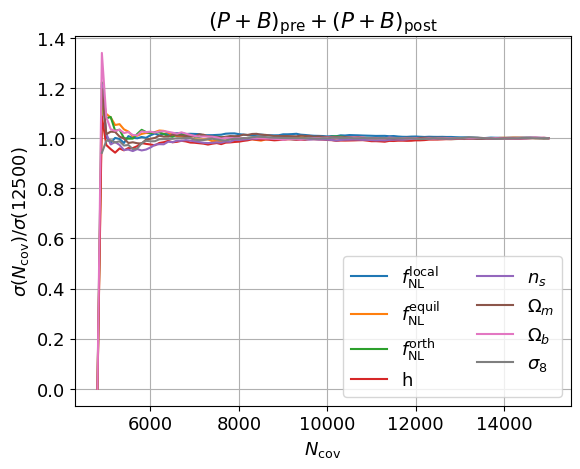

In [98]:
plt.plot(Ns,(convs_PB / convs_PB[-1])[:,2,:])
print(Ns)
plt.legend(params,ncols=2)
plt.title('$(P+B)_{\\rm{pre}}+(P+B)_{\\rm{post}}$')
plt.xlabel("$N_{\\rm cov}$")
plt.ylabel("$\sigma(N_{\\rm cov})/\sigma(12500)$")
plt.grid()
plt.show()

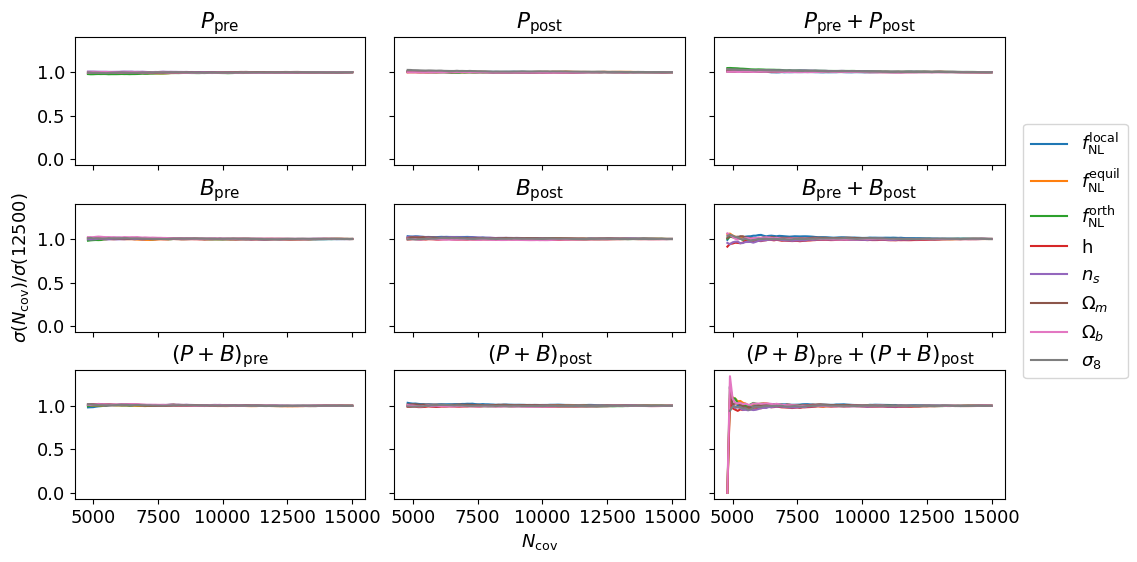

In [99]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(3, 3, wspace=.1,hspace=.3)
ax = gs.subplots(sharex=True, sharey=True)

ax[0,0].plot(Ns,(convs_P / convs_P[-1])[:,0,:])
ax[0,0].set_title('$P_{\\rm{pre}}$')
ax[0,1].plot(Ns,(convs_P / convs_P[-1])[:,1,:])
ax[0,1].set_title('$P_{\\rm{post}}$')
ax[0,2].plot(Ns,(convs_P / convs_P[-1])[:,2,:])
ax[0,2].set_title('$P_{\\rm{pre}}+P_{\\rm{post}}$')

ax[1,0].plot(Ns,(convs_B / convs_B[-1])[:,0,:])
ax[1,0].set_title('$B_{\\rm{pre}}$')
ax[1,1].plot(Ns,(convs_B / convs_B[-1])[:,1,:])
ax[1,1].set_title('$B_{\\rm{post}}$')
ax[1,2].plot(Ns,(convs_B / convs_B[-1])[:,2,:])
ax[1,2].set_title('$B_{\\rm{pre}}+B_{\\rm{post}}$')

ax[2,0].plot(Ns,(convs_PB / convs_PB[-1])[:,0,:])
ax[2,0].set_title('$(P+B)_{\\rm{pre}}$')
ax[2,1].plot(Ns,(convs_PB / convs_PB[-1])[:,1,:])
ax[2,1].set_title('$(P+B)_{\\rm{post}}$')
ax[2,2].plot(Ns,(convs_PB / convs_PB[-1])[:,2,:])
ax[2,2].set_title('$(P+B)_{\\rm{pre}}+(P+B)_{\\rm{post}}$')


fig.legend(params,bbox_to_anchor=(1.01, 0.75))

ax[2,1].set_xlabel("$N_{\\rm cov}$")
ax[1,0].set_ylabel("$\sigma(N_{\\rm cov})/\sigma(12500)$")

# ax[1].grid()
# ax[1].set_xlabel("$N_{\\rm cov}$")
# ax[2].grid()

# fig.tight_layout()
fig.savefig('Plots/convergence_cov.pdf',format='pdf',bbox_inches='tight')
fig.show()

In [97]:
def deriv_P(N):
    dPdf_pre = np.zeros((8,Pk_fiducial_pre[:N].mean(0).shape[0]))
    dPdf_pre[0] = (Pk_LC_p_pre[:N].mean(0) - Pk_LC_m_pre[:N].mean(0))/200.
    dPdf_pre[1] = (Pk_EQ_p_pre[:N].mean(0) - Pk_EQ_m_pre[:N].mean(0))/200.
    dPdf_pre[2] = (Pk_OR_LSS_p_pre[:N].mean(0) - Pk_OR_LSS_m_pre[:N].mean(0))/200.
    dPdf_pre[3] = (Pk_h_p_pre[:N].mean(0) - Pk_h_m_pre[:N].mean(0))/(0.6911-0.6511)
    dPdf_pre[4] = (Pk_ns_p_pre[:N].mean(0) - Pk_ns_m_pre[:N].mean(0))/(0.9824-0.9424)
    dPdf_pre[5] = (Pk_Om_p_pre[:N].mean(0) - Pk_Om_m_pre[:N].mean(0))/(0.3275-0.3075)
    dPdf_pre[6] = (Pk_Ob2_p_pre[:N].mean(0) - Pk_Ob2_m_pre[:N].mean(0))/(0.051-0.047)
    dPdf_pre[7] = (Pk_s8_p_pre[:N].mean(0) - Pk_s8_m_pre[:N].mean(0))/(0.849-0.819)
    
    dPdf_post = np.zeros((8,Pk_fiducial_post[:N].mean(0).shape[0]))
    dPdf_post[0] = (Pk_LC_p_post[:N].mean(0) - Pk_LC_m_post[:N].mean(0))/200.
    dPdf_post[1] = (Pk_EQ_p_post[:N].mean(0) - Pk_EQ_m_post[:N].mean(0))/200.
    dPdf_post[2] = (Pk_OR_LSS_p_post[:N].mean(0) - Pk_OR_LSS_m_post[:N].mean(0))/200.
    dPdf_post[3] = (Pk_h_p_post[:N].mean(0) - Pk_h_m_post[:N].mean(0))/(0.6911-0.6511)
    dPdf_post[4] = (Pk_ns_p_post[:N].mean(0) - Pk_ns_m_post[:N].mean(0))/(0.9824-0.9424)
    dPdf_post[5] = (Pk_Om_p_post[:N].mean(0) - Pk_Om_m_post[:N].mean(0))/(0.3275-0.3075)
    dPdf_post[6] = (Pk_Ob2_p_post[:N].mean(0) - Pk_Ob2_m_post[:N].mean(0))/(0.051-0.047)
    dPdf_post[7] = (Pk_s8_p_post[:N].mean(0) - Pk_s8_m_post[:N].mean(0))/(0.849-0.819)
    
    dPdf_both = np.concatenate([dPdf_pre,dPdf_post],axis=-1)

    Fish_P_pre = dPdf_pre.dot(Cov_P_pre_Inv_wHartlap).dot(dPdf_pre.T)
    Fish_P_post = dPdf_post.dot(Cov_P_post_Inv_wHartlap).dot(dPdf_post.T)
    Fish_P_both = dPdf_both.dot(Cov_P_both_Inv_wHartlap).dot(dPdf_both.T)

    Fish_P_pre_Inv = np.linalg.inv(Fish_P_pre)
    Fish_P_post_Inv = np.linalg.inv(Fish_P_post)
    Fish_P_both_Inv = np.linalg.inv(Fish_P_both)

    return np.diag(Fish_P_pre_Inv)**.5,np.diag(Fish_P_post_Inv)**.5,np.diag(Fish_P_both_Inv)**.5

In [98]:
def deriv_B(N):
    dBdf_pre = np.zeros((8,Bk_fiducial_pre[:N].mean(0).shape[0]))
    dBdf_pre[0] = (Bk_LC_p_pre[:N].mean(0) - Bk_LC_m_pre[:N].mean(0))/200.
    dBdf_pre[1] = (Bk_EQ_p_pre[:N].mean(0) - Bk_EQ_m_pre[:N].mean(0))/200.
    dBdf_pre[2] = (Bk_OR_LSS_p_pre[:N].mean(0) - Bk_OR_LSS_m_pre[:N].mean(0))/200.
    dBdf_pre[3] = (Bk_h_p_pre[:N].mean(0) - Bk_h_m_pre[:N].mean(0))/(0.6911-0.6511)
    dBdf_pre[4] = (Bk_ns_p_pre[:N].mean(0) - Bk_ns_m_pre[:N].mean(0))/(0.9824-0.9424)
    dBdf_pre[5] = (Bk_Om_p_pre[:N].mean(0) - Bk_Om_m_pre[:N].mean(0))/(0.3275-0.3075)
    dBdf_pre[6] = (Bk_Ob2_p_pre[:N].mean(0) - Bk_Ob2_m_pre[:N].mean(0))/(0.051-0.047)
    dBdf_pre[7] = (Bk_s8_p_pre[:N].mean(0) - Bk_s8_m_pre[:N].mean(0))/(0.849-0.819)
    
    dBdf_post = np.zeros((8,Bk_fiducial_post[:N].mean(0).shape[0]))
    dBdf_post[0] = (Bk_LC_p_post[:N].mean(0) - Bk_LC_m_post[:N].mean(0))/200.
    dBdf_post[1] = (Bk_EQ_p_post[:N].mean(0) - Bk_EQ_m_post[:N].mean(0))/200.
    dBdf_post[2] = (Bk_OR_LSS_p_post[:N].mean(0) - Bk_OR_LSS_m_post[:N].mean(0))/200.
    dBdf_post[3] = (Bk_h_p_post[:N].mean(0) - Bk_h_m_post[:N].mean(0))/(0.6911-0.6511)
    dBdf_post[4] = (Bk_ns_p_post[:N].mean(0) - Bk_ns_m_post[:N].mean(0))/(0.9824-0.9424)
    dBdf_post[5] = (Bk_Om_p_post[:N].mean(0) - Bk_Om_m_post[:N].mean(0))/(0.3275-0.3075)
    dBdf_post[6] = (Bk_Ob2_p_post[:N].mean(0) - Bk_Ob2_m_post[:N].mean(0))/(0.051-0.047)
    dBdf_post[7] = (Bk_s8_p_post[:N].mean(0) - Bk_s8_m_post[:N].mean(0))/(0.849-0.819)
    
    dBdf_both = np.concatenate([dBdf_pre,dBdf_post],axis=-1)

    Fish_B_pre = dBdf_pre.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pre.T)
    Fish_B_post = dBdf_post.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_post.T)
    Fish_B_both = dBdf_both.dot(Cov_B_both_Inv_wHartlap).dot(dBdf_both.T)

    Fish_B_pre_Inv = np.linalg.inv(Fish_B_pre)
    Fish_B_post_Inv = np.linalg.inv(Fish_B_post)
    Fish_B_both_Inv = np.linalg.inv(Fish_B_both)

    return np.diag(Fish_B_pre_Inv)**.5,np.diag(Fish_B_post_Inv)**.5,np.diag(Fish_B_both_Inv)**.5

In [99]:
def deriv_PB(N):
    dPBdf_pre = np.zeros((8,PB_fiducial_pre[:N].mean(0).shape[0]))
    dPBdf_pre[0] = (PB_LC_p_pre[:N].mean(0) - PB_LC_m_pre[:N].mean(0))/200.
    dPBdf_pre[1] = (PB_EQ_p_pre[:N].mean(0) - PB_EQ_m_pre[:N].mean(0))/200.
    dPBdf_pre[2] = (PB_OR_LSS_p_pre[:N].mean(0) - PB_OR_LSS_m_pre[:N].mean(0))/200.
    dPBdf_pre[3] = (PB_h_p_pre[:N].mean(0) - PB_h_m_pre[:N].mean(0))/(0.6911-0.6511)
    dPBdf_pre[4] = (PB_ns_p_pre[:N].mean(0) - PB_ns_m_pre[:N].mean(0))/(0.9824-0.9424)
    dPBdf_pre[5] = (PB_Om_p_pre[:N].mean(0) - PB_Om_m_pre[:N].mean(0))/(0.3275-0.3075)
    dPBdf_pre[6] = (PB_Ob2_p_pre[:N].mean(0) - PB_Ob2_m_pre[:N].mean(0))/(0.051-0.047)
    dPBdf_pre[7] = (PB_s8_p_pre[:N].mean(0) - PB_s8_m_pre[:N].mean(0))/(0.849-0.819)
    
    dPBdf_post = np.zeros((8,PB_fiducial_post[:N].mean(0).shape[0]))
    dPBdf_post[0] = (PB_LC_p_post[:N].mean(0) - PB_LC_m_post[:N].mean(0))/200.
    dPBdf_post[1] = (PB_EQ_p_post[:N].mean(0) - PB_EQ_m_post[:N].mean(0))/200.
    dPBdf_post[2] = (PB_OR_LSS_p_post[:N].mean(0) - PB_OR_LSS_m_post[:N].mean(0))/200.
    dPBdf_post[3] = (PB_h_p_post[:N].mean(0) - PB_h_m_post[:N].mean(0))/(0.6911-0.6511)
    dPBdf_post[4] = (PB_ns_p_post[:N].mean(0) - PB_ns_m_post[:N].mean(0))/(0.9824-0.9424)
    dPBdf_post[5] = (PB_Om_p_post[:N].mean(0) - PB_Om_m_post[:N].mean(0))/(0.3275-0.3075)
    dPBdf_post[6] = (PB_Ob2_p_post[:N].mean(0) - PB_Ob2_m_post[:N].mean(0))/(0.051-0.047)
    dPBdf_post[7] = (PB_s8_p_post[:N].mean(0) - PB_s8_m_post[:N].mean(0))/(0.849-0.819)
    
    dPBdf_both = np.concatenate([dPBdf_pre,dPBdf_post],axis=-1)

    Fish_PB_pre = dPBdf_pre.dot(Cov_PB_pre_Inv_wHartlap).dot(dPBdf_pre.T)
    Fish_PB_post = dPBdf_post.dot(Cov_PB_post_Inv_wHartlap).dot(dPBdf_post.T)
    Fish_PB_both = dPBdf_both.dot(Cov_PB_both_Inv_wHartlap).dot(dPBdf_both.T)

    Fish_PB_pre_Inv = np.linalg.inv(Fish_PB_pre)
    Fish_PB_post_Inv = np.linalg.inv(Fish_PB_post)
    Fish_PB_both_Inv = np.linalg.inv(Fish_PB_both)
    
    return np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_post_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5

In [101]:
Ns_deriv = np.arange(0,501,10)[1:]

derivs_P = np.array([deriv_P(N) for N in Ns_deriv])
derivs_B = np.array([deriv_B(N) for N in Ns_deriv])
derivs_PB = np.array([deriv_PB(N) for N in Ns_deriv])

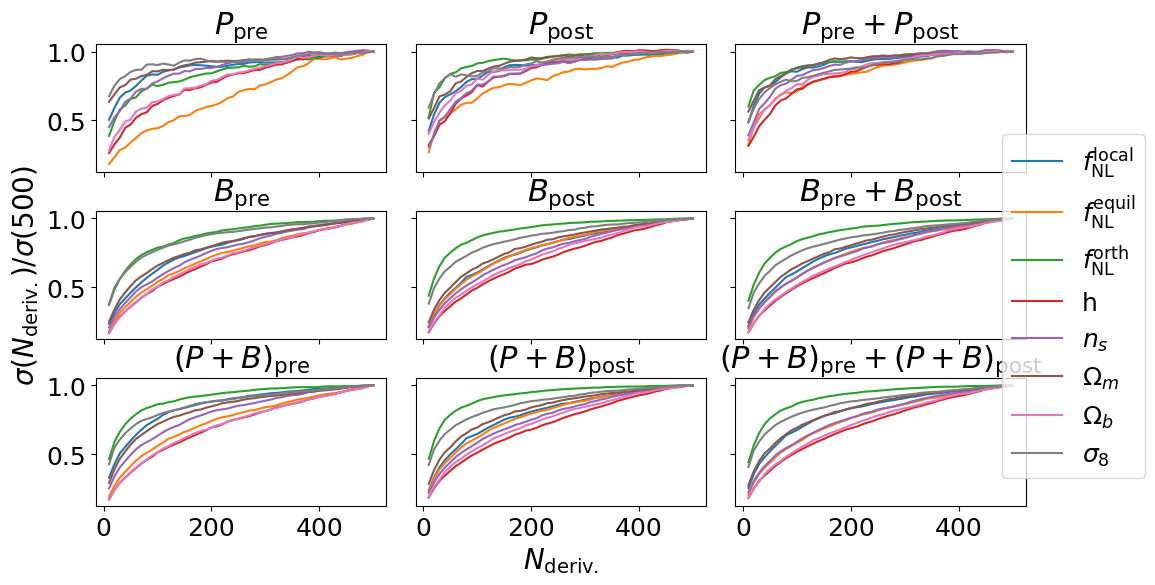

In [102]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(3, 3, wspace=.1,hspace=.3)
ax = gs.subplots(sharex=True, sharey=True)


ax[0,0].plot(Ns_deriv,(derivs_P / derivs_P[-1])[:,0,:])
ax[0,0].set_title('$P_{\\rm{pre}}$')
ax[0,1].plot(Ns_deriv,(derivs_P / derivs_P[-1])[:,1,:])
ax[0,1].set_title('$P_{\\rm{post}}$')
ax[0,2].plot(Ns_deriv,(derivs_P / derivs_P[-1])[:,2,:])
ax[0,2].set_title('$P_{\\rm{pre}}+P_{\\rm{post}}$')

ax[1,0].plot(Ns_deriv,(derivs_B / derivs_B[-1])[:,0,:])
ax[1,0].set_title('$B_{\\rm{pre}}$')
ax[1,1].plot(Ns_deriv,(derivs_B / derivs_B[-1])[:,1,:])
ax[1,1].set_title('$B_{\\rm{post}}$')
ax[1,2].plot(Ns_deriv,(derivs_B / derivs_B[-1])[:,2,:])
ax[1,2].set_title('$B_{\\rm{pre}}+B_{\\rm{post}}$')

ax[2,0].plot(Ns_deriv,(derivs_PB / derivs_PB[-1])[:,0,:])
ax[2,0].set_title('$(P+B)_{\\rm{pre}}$')
ax[2,1].plot(Ns_deriv,(derivs_PB / derivs_PB[-1])[:,1,:])
ax[2,1].set_title('$(P+B)_{\\rm{post}}$')
ax[2,2].plot(Ns_deriv,(derivs_PB / derivs_PB[-1])[:,2,:])
ax[2,2].set_title('$(P+B)_{\\rm{pre}}+(P+B)_{\\rm{post}}$')


fig.legend(params,bbox_to_anchor=(1.01, 0.75))

ax[2,1].set_xlabel("$N_{\\rm deriv.}$")
ax[1,0].set_ylabel("$\sigma(N_{\\rm deriv.})/\sigma(500)$")

# fig.tight_layout()
fig.savefig('Plots/convergence_deriv.pdf',format='pdf',bbox_inches='tight')
fig.show()